In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker




plt.rcParams["font.size"] = 12
plt.rcParams["figure.dpi"] = 300

def get_for_file(nfiles):
    fig, ax = plt.subplots(1,2, figsize=(15,5))
    n = [1] + list(range(32,129,32))+list(range(8, 32, 8))

    labels = ['coffea', 'O1', 'O2', 'O3']
    colors = ['r', 'k', 'b', 'g']
    colors = {labels[i]:colors[i] for i in range(len(labels))}

    for label in labels:
        t = []
        mem = []
        for ncores in n:
            file = f'benchmarks/{nfiles}/{label}/{ncores}/1'
            with open(file, 'r') as f:
                for line in f.readlines():
                    if (label == 'coffea'):
                        if 'execution took' in line:
                            time = float(line.split()[2])
                            t.append(time)
                    else:
                        if 'RunGraphs' in line and 'elapsed' in line:
                            time = float(line.split()[-2][0:-1])
                            t.append(time)
                    if 'maxresident' in line:
                        ram = int(line.split()[-1].split('maxresident')[0])#/100000
                        mem.append(ram)
        ax[0].plot(n, t, f'{colors[label]}s', label = label)
        mem = np.array(mem)/1e6 if label=='coffea' else np.array(mem)/1e6
        if label == 'coffea': ax[1].plot(n, mem, f'{colors[label]}D', label = label)
        else: ax[1].plot(n, mem, f'{colors[label]}D', label = label)



    ax[0].set_xlabel('Number of cores')
    ax[0].set_ylabel('t [s]')
    ax[0].grid()
    ax[0].set_xticks(n)
#     ax[0].set_yticks(list(range(0, 1100, 100)))
    #ax[0].yaxis.set_major_formatter(ticker.ScalarFormatter(useOffset=False))
    ax[0].legend()
    ax[0].set_title(f'time for {nfiles} files per sample', fontsize=14, x=0.5, y=1.05)
    # ax[0].set_ylim([0,360])

    ax[1].set_xlabel('Number of cores')
    ax[1].set_ylabel('RAM [GB]')
    ax[1].grid()
    ax[1].set_xticks(n)
    ax[1].legend()
    ax[1].set_title(f'RAM for {nfiles} files per sample', fontsize=14, x=0.5, y=1.05)
    # ax[1].set_ylim([0,352])
    return fig



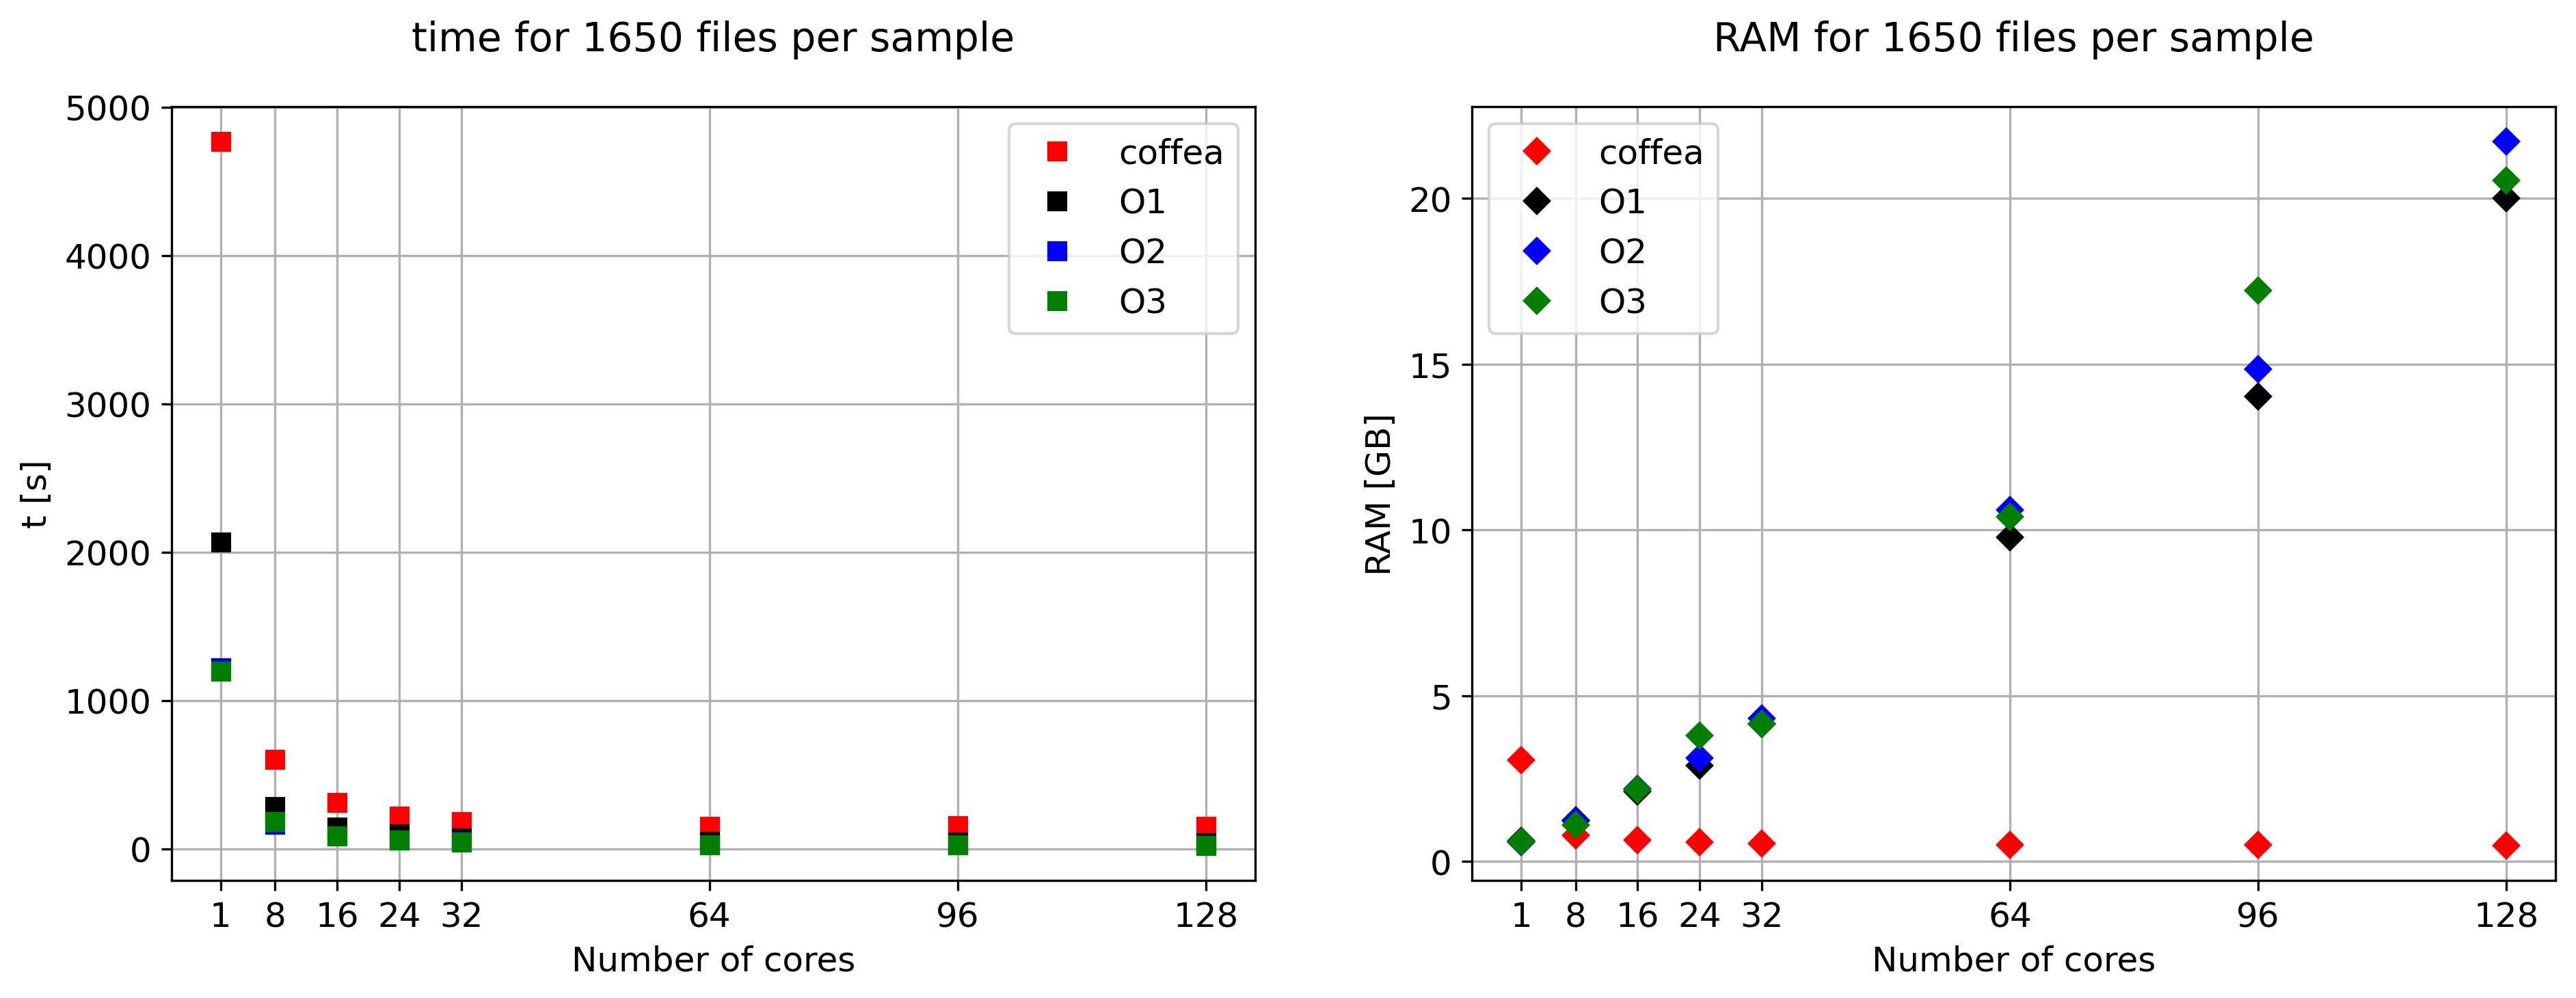

In [19]:
fig = get_for_file(1650)

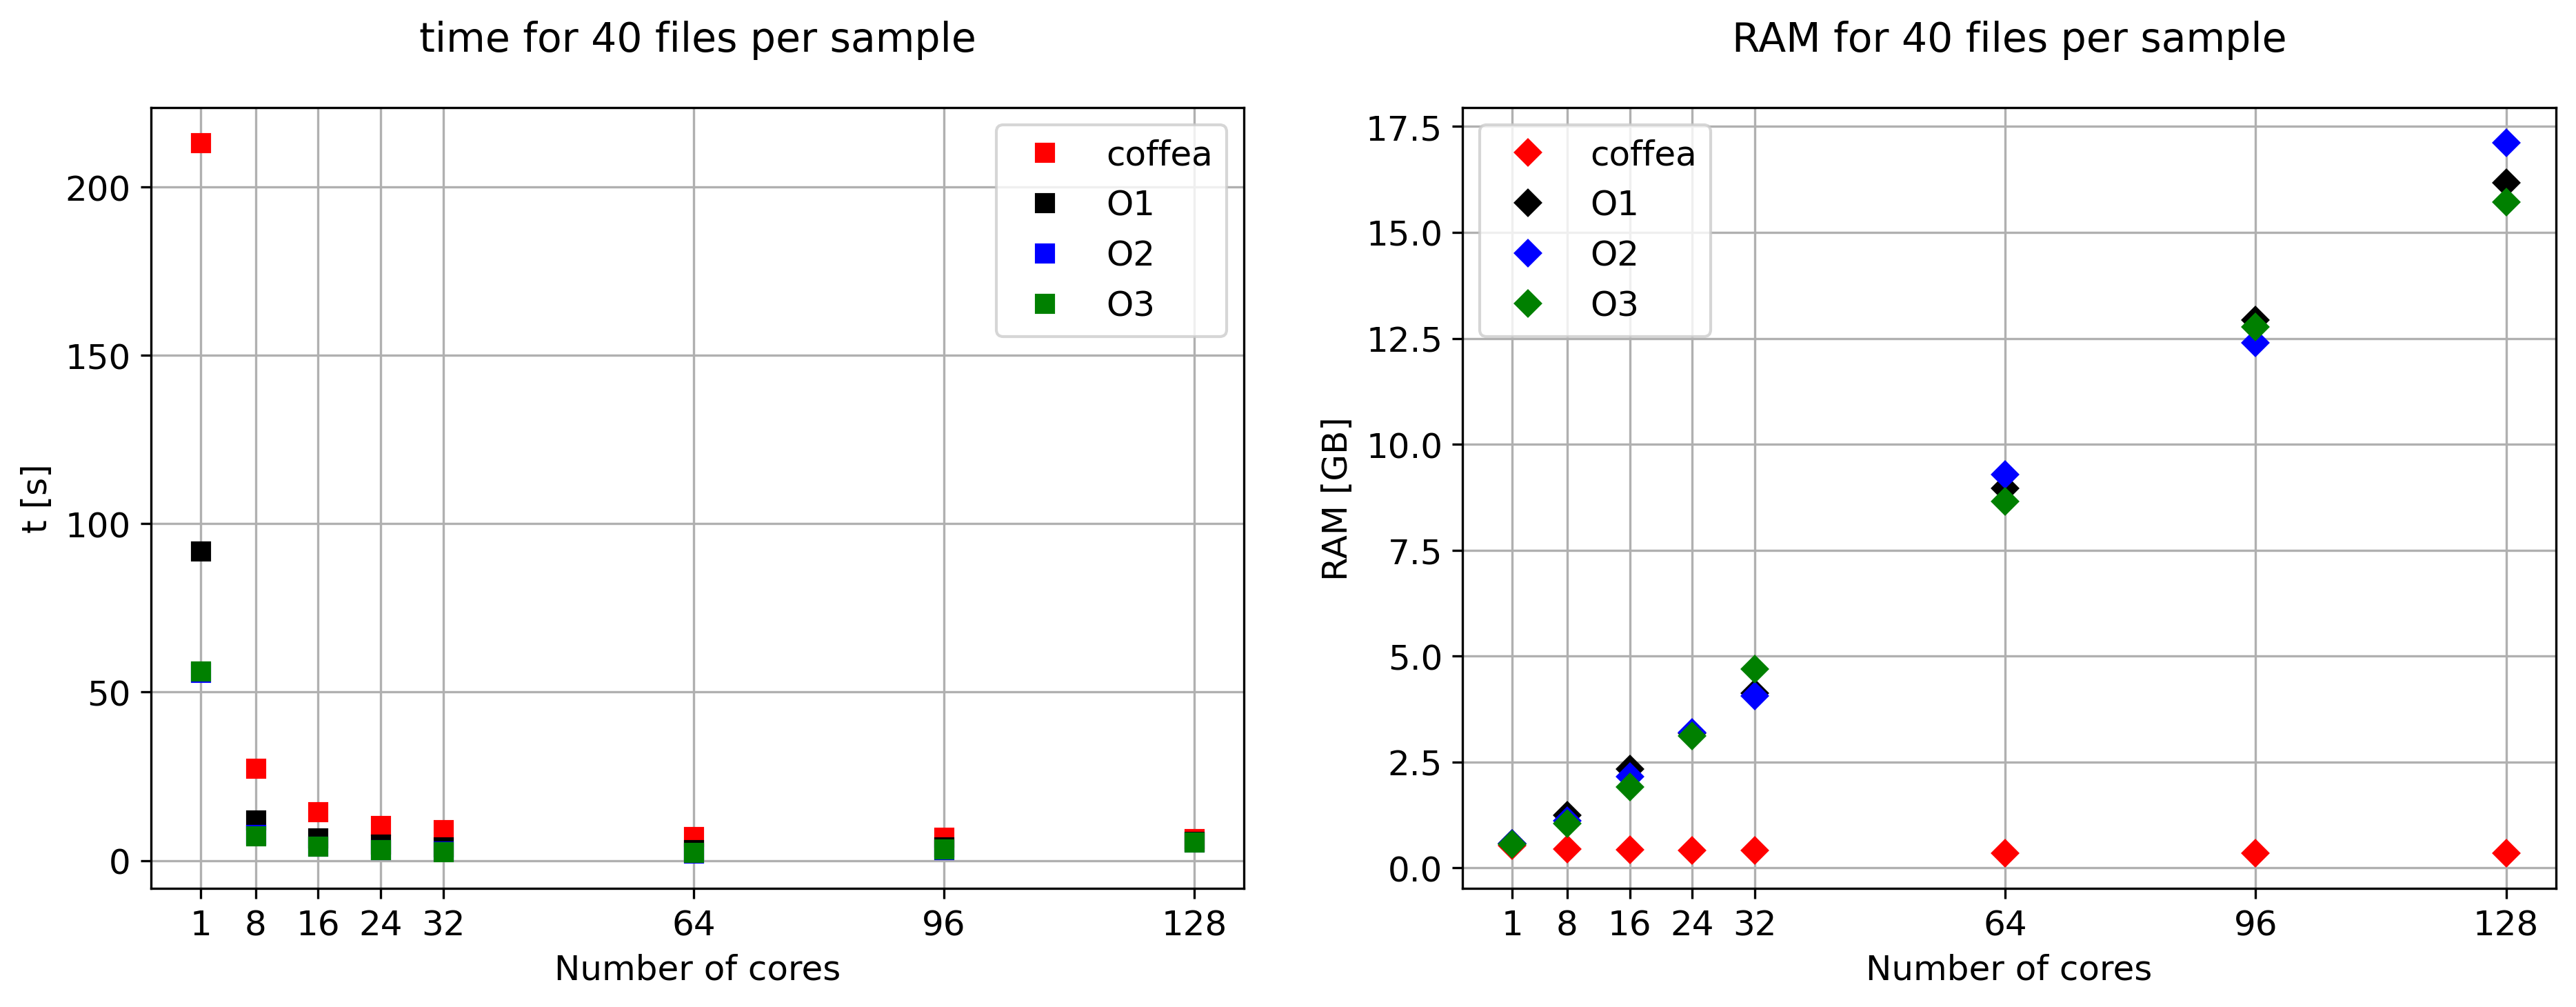

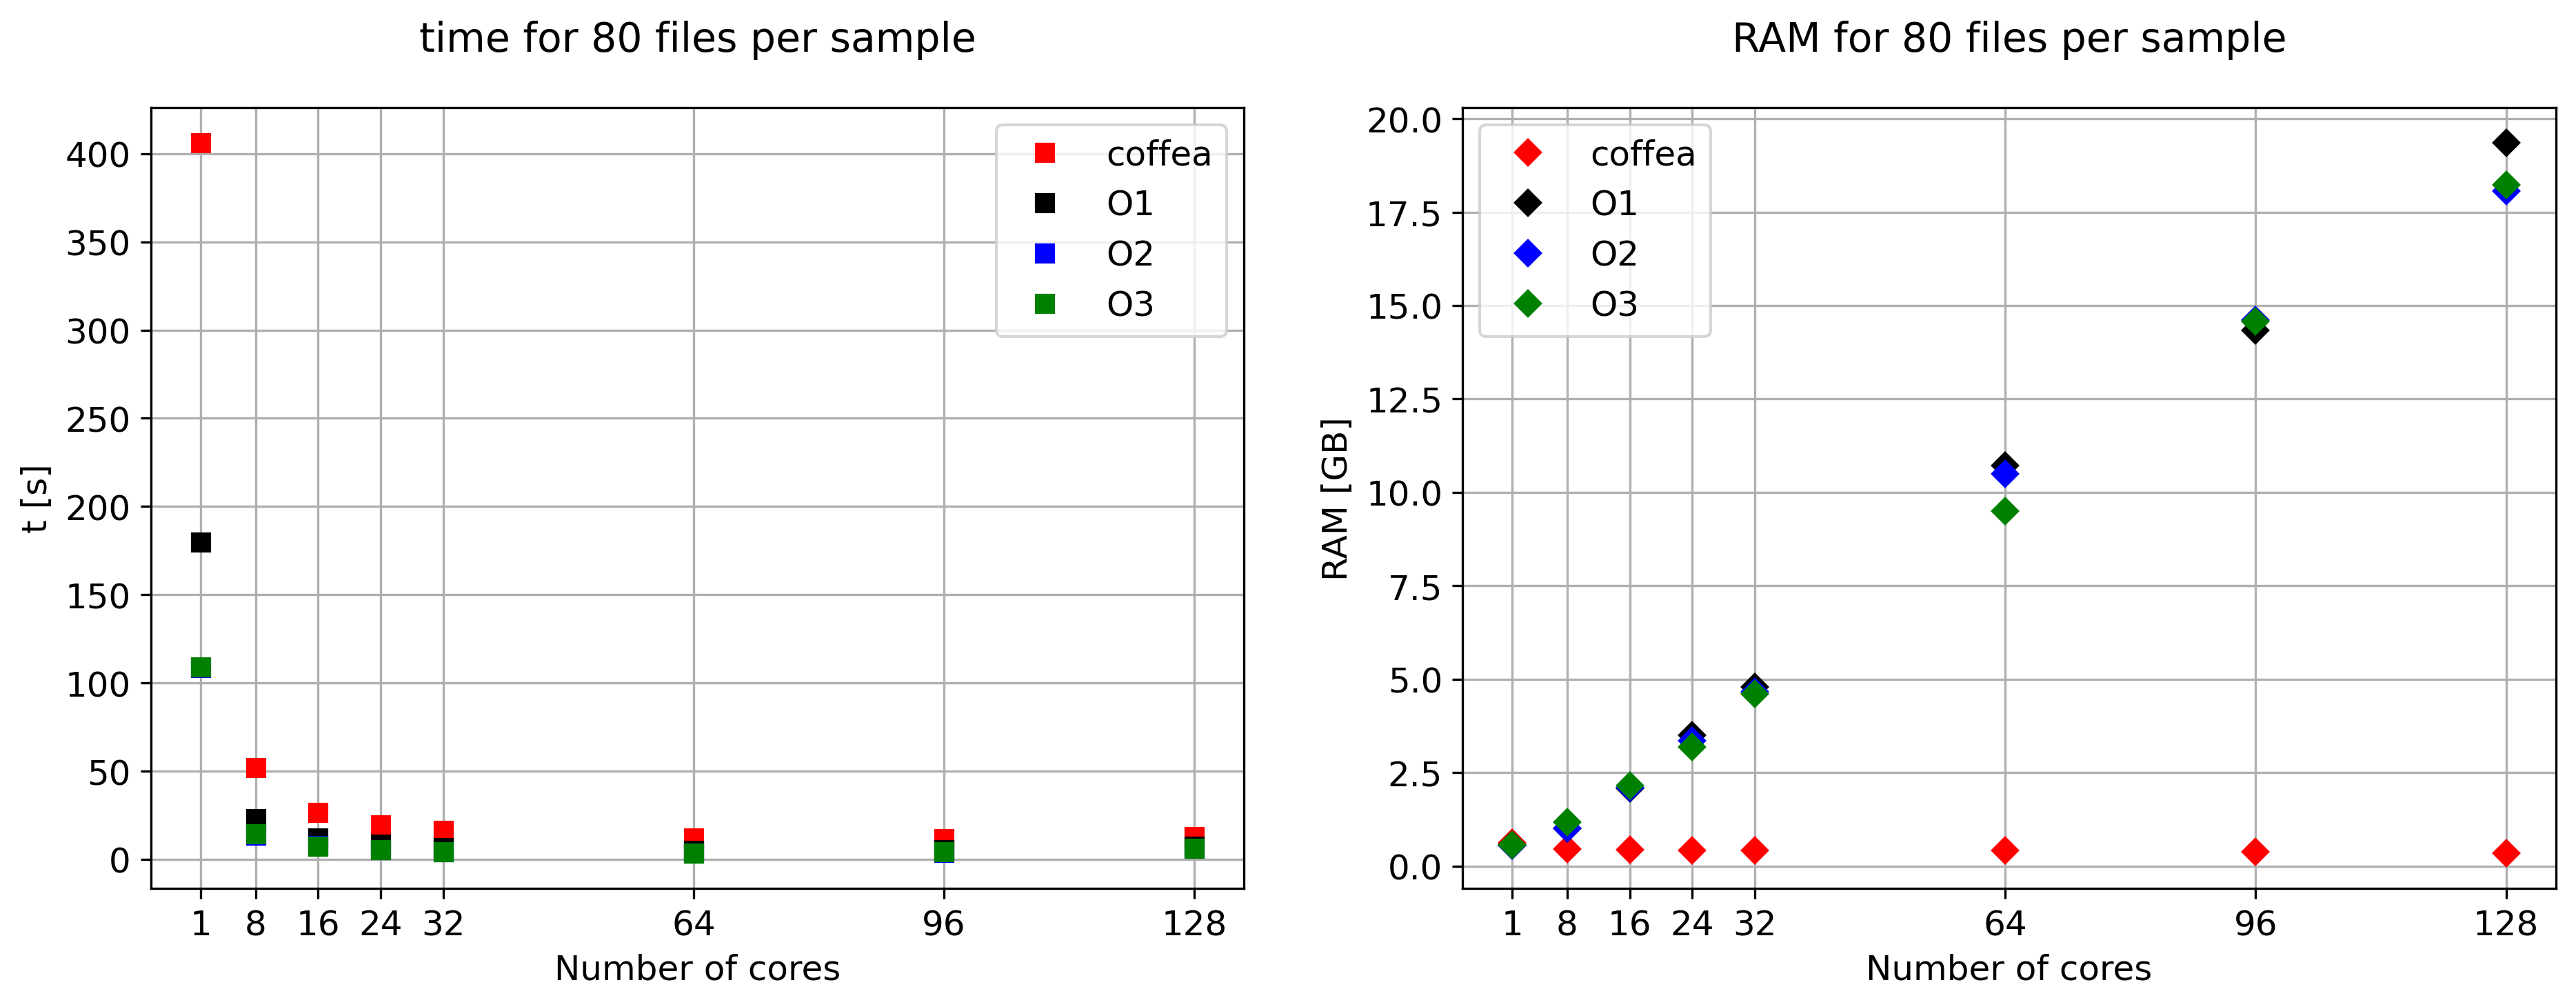

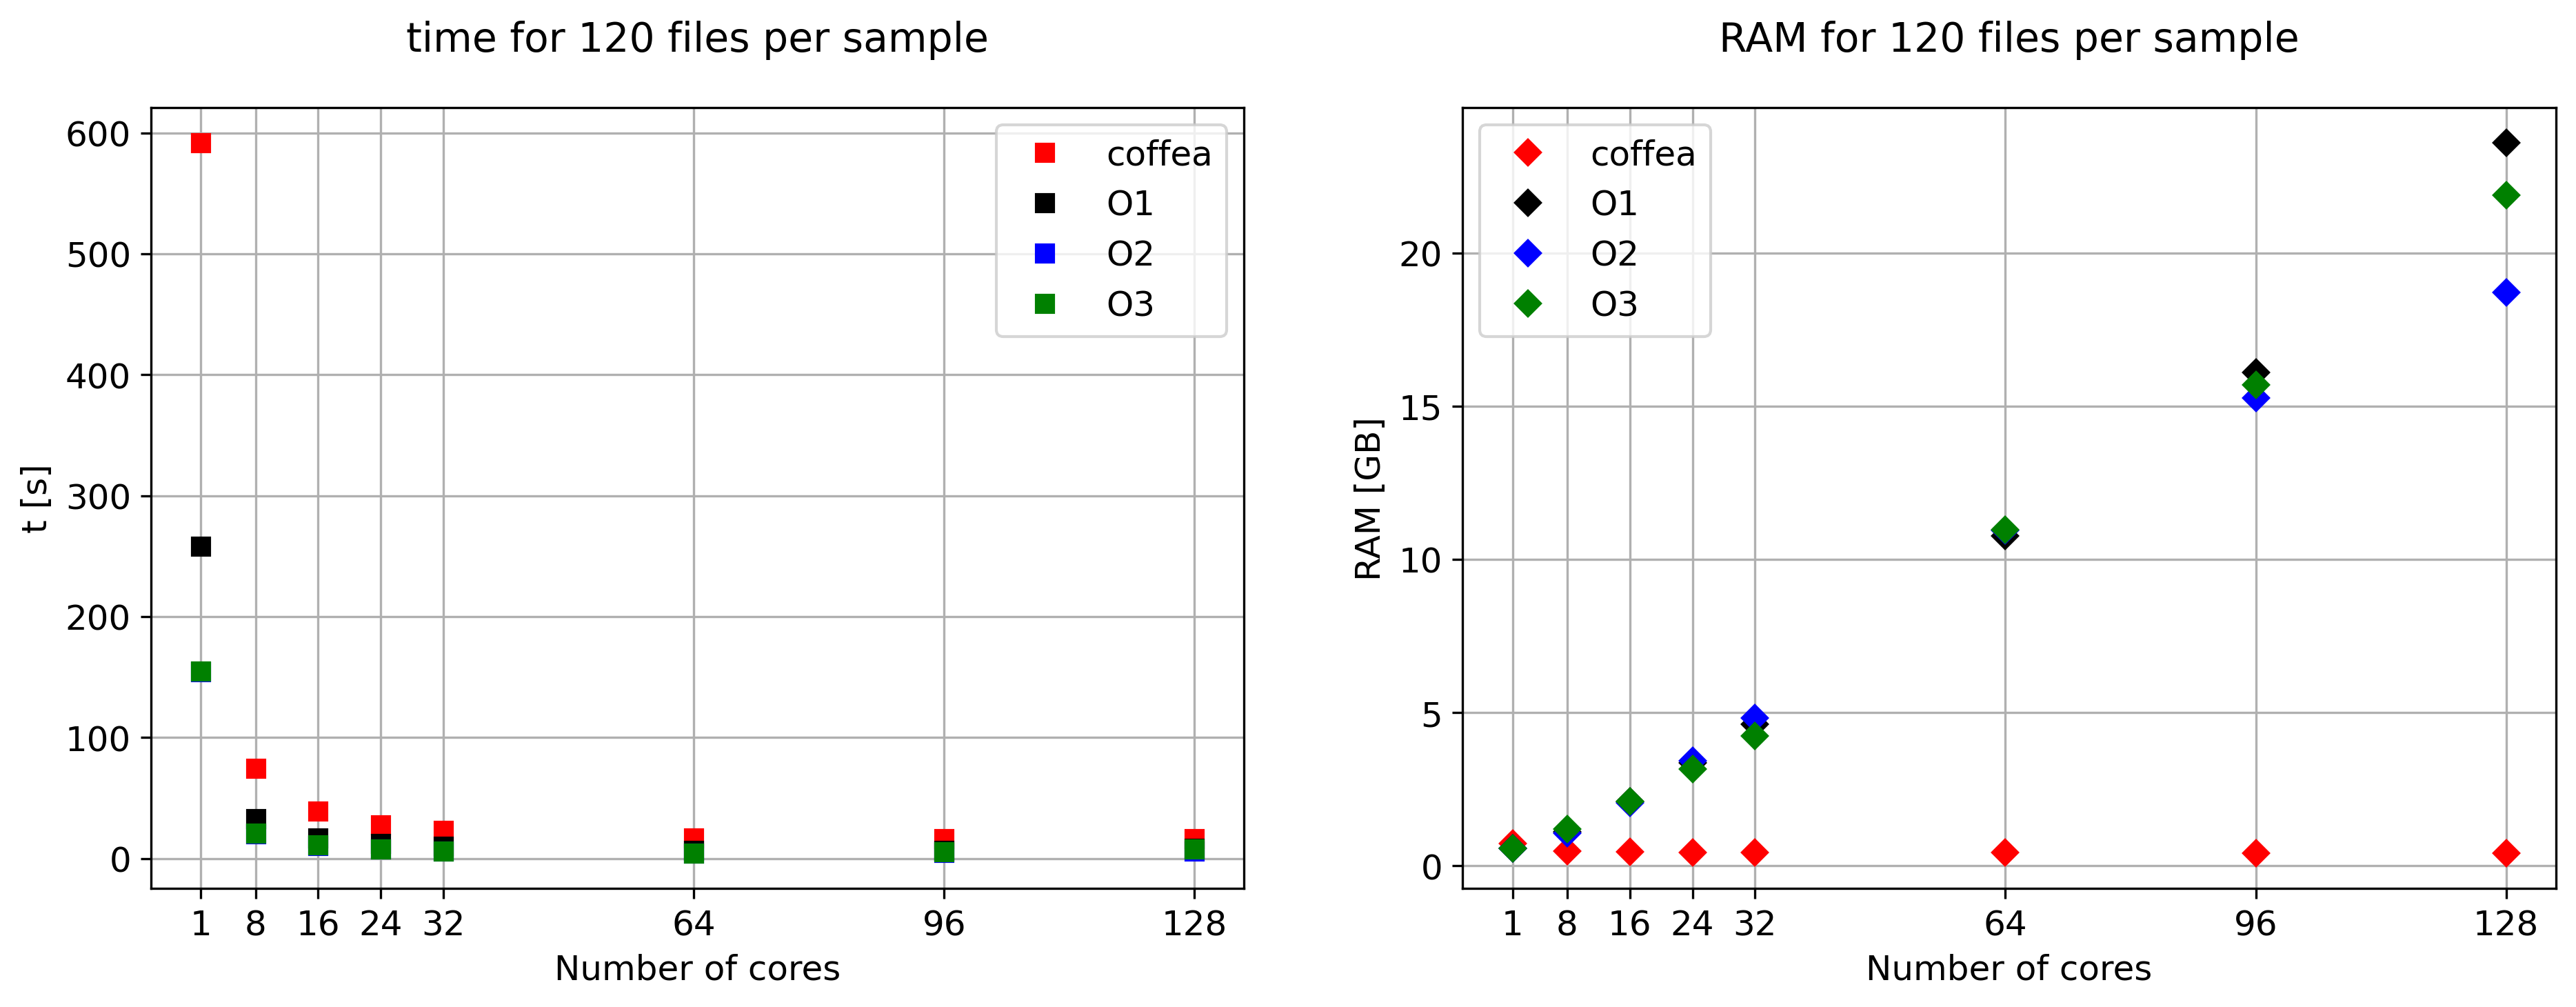

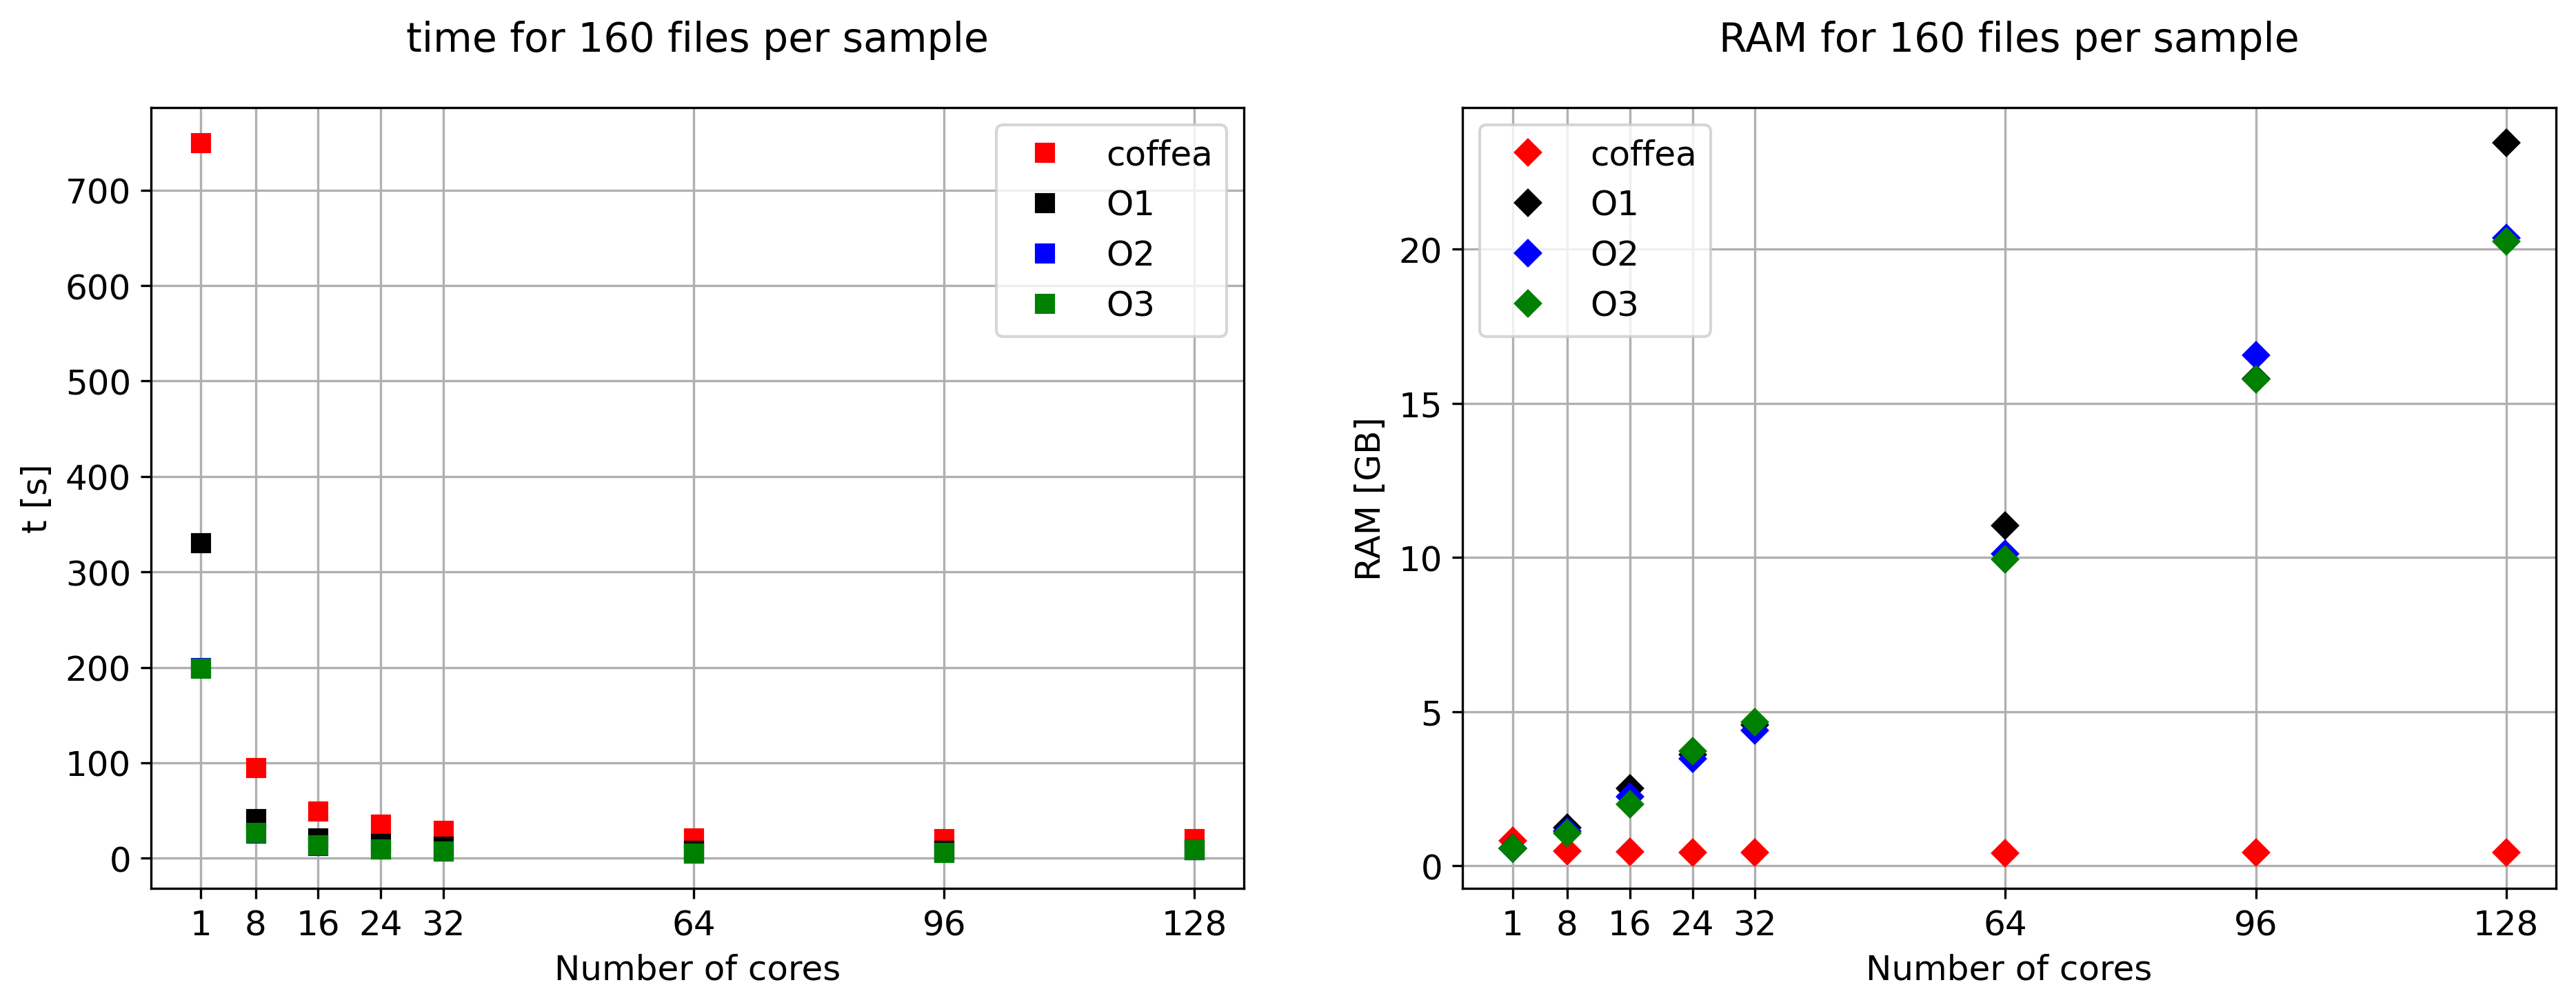

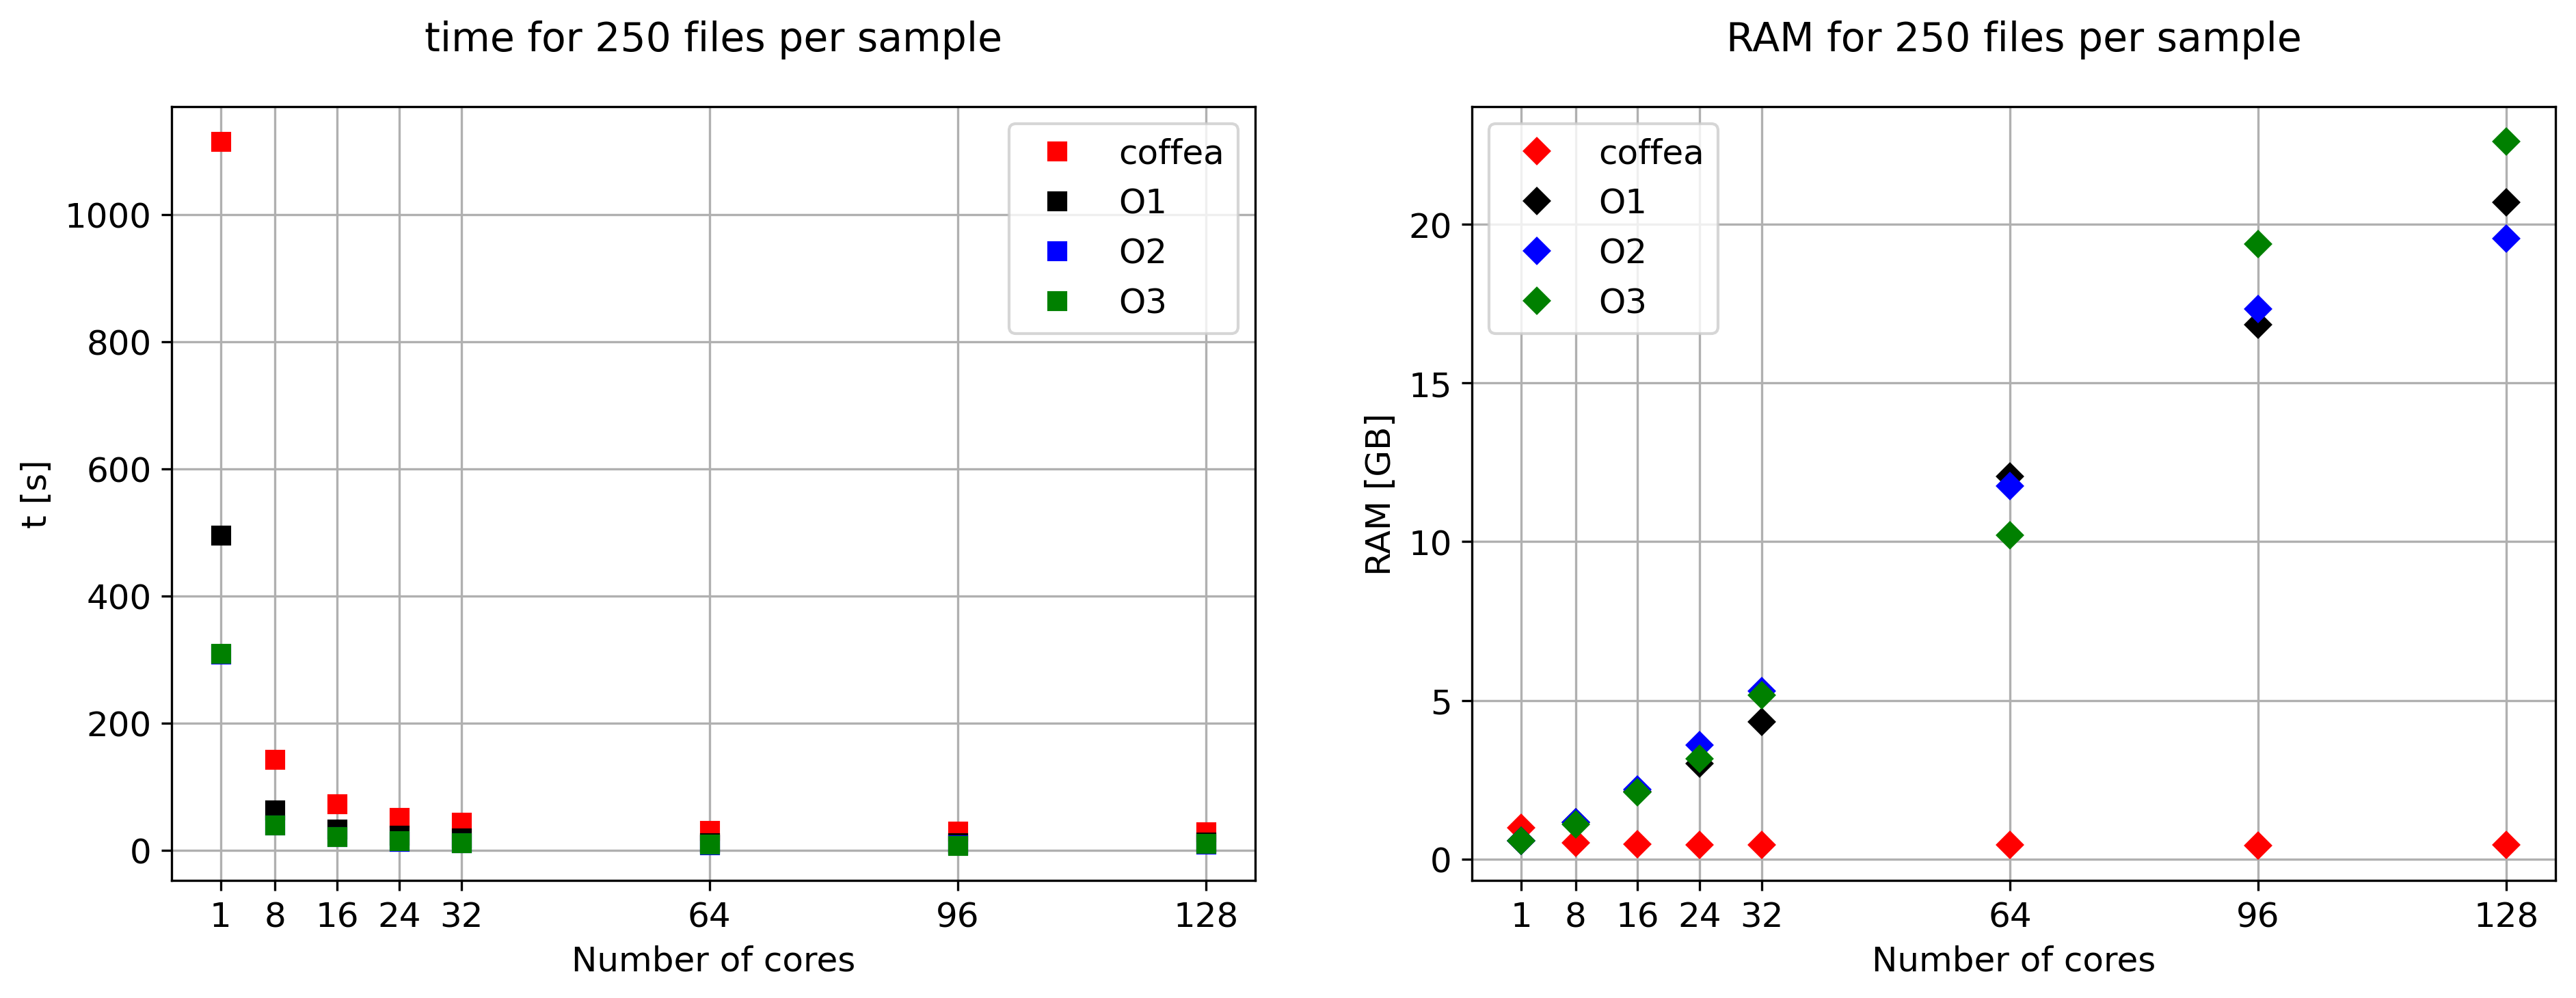

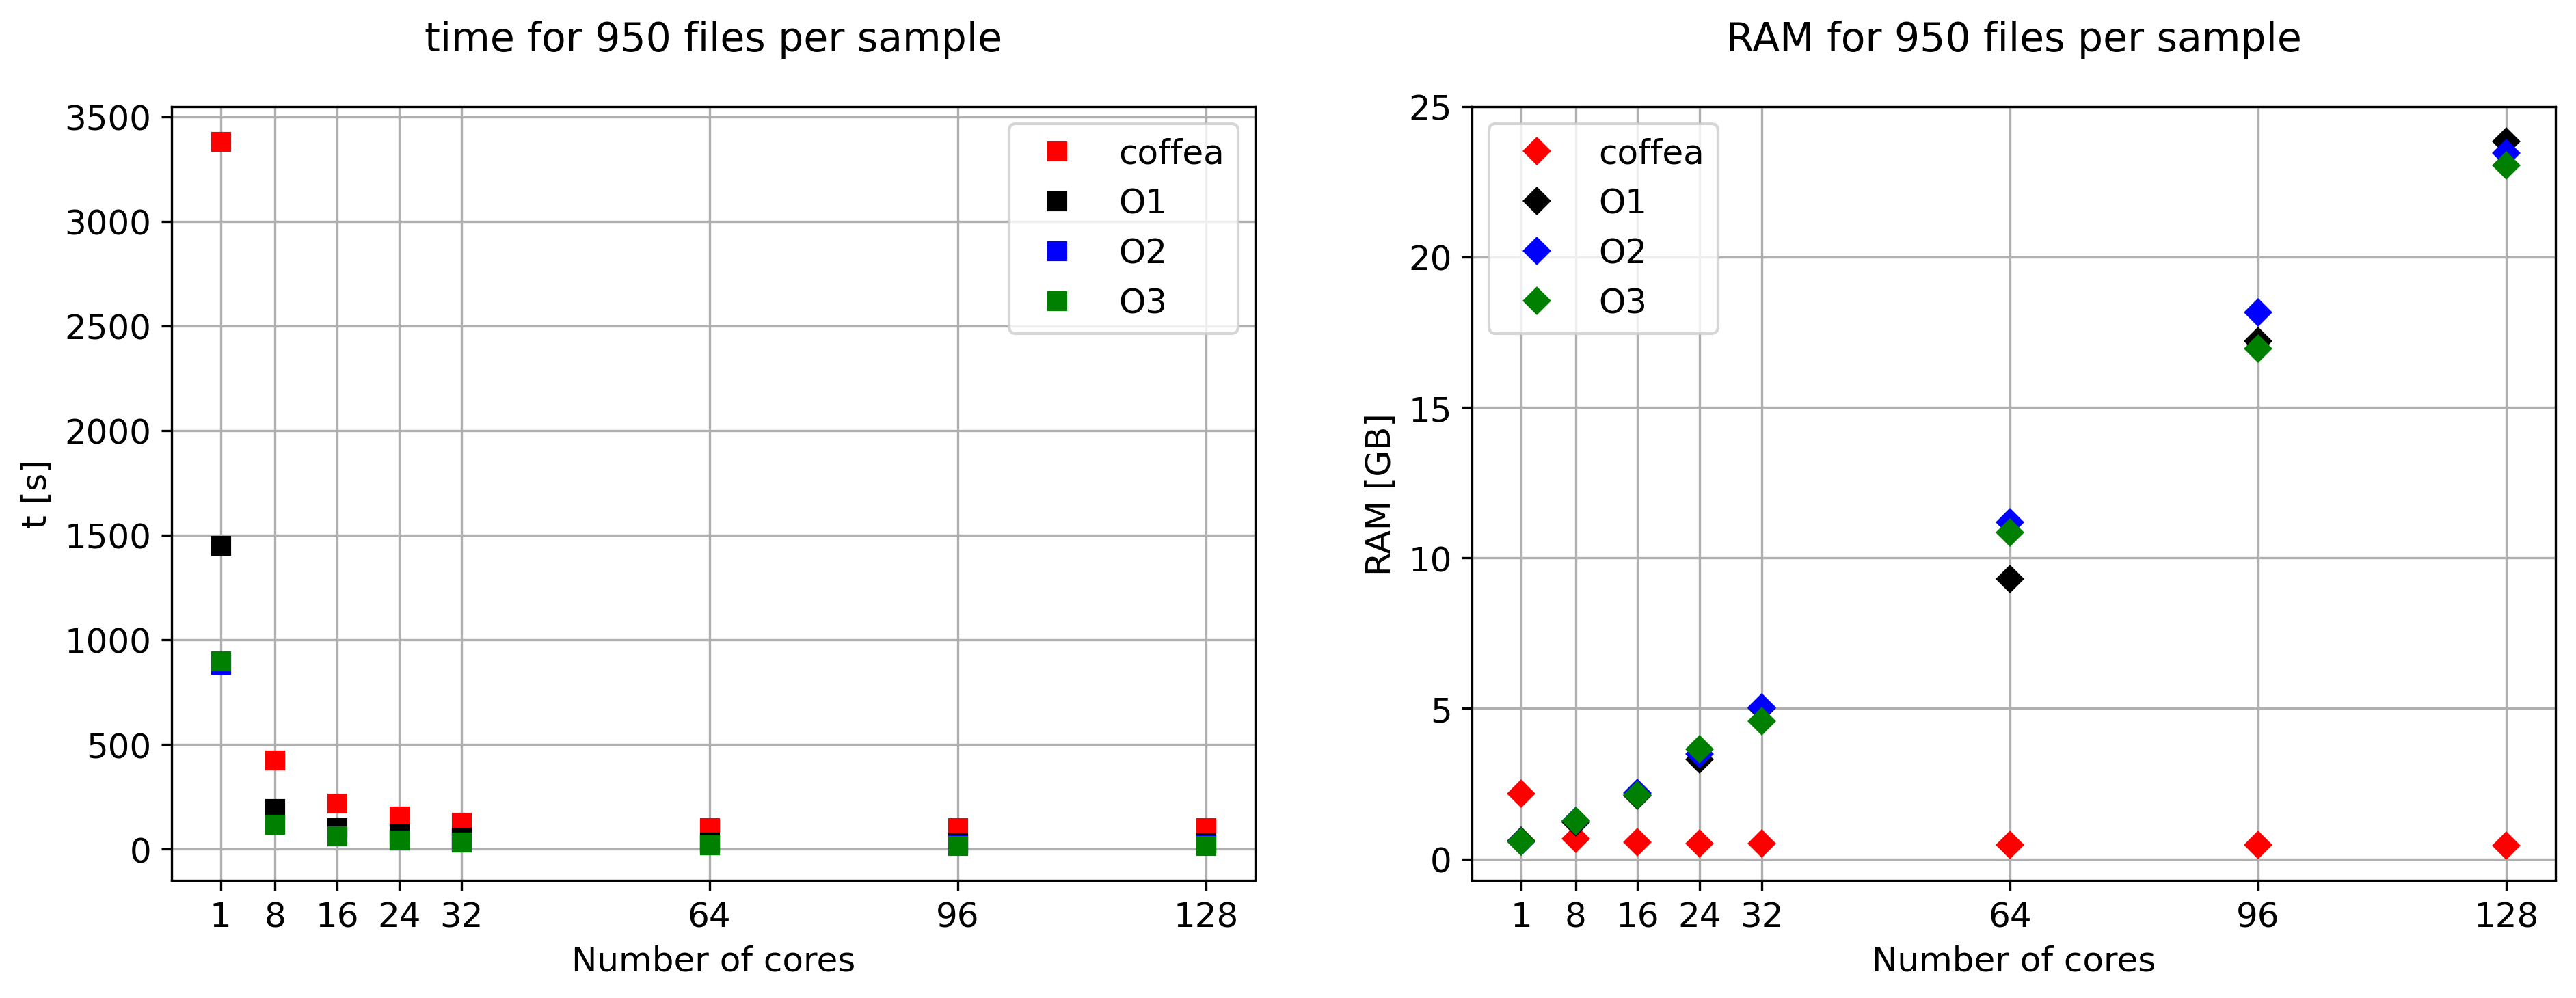

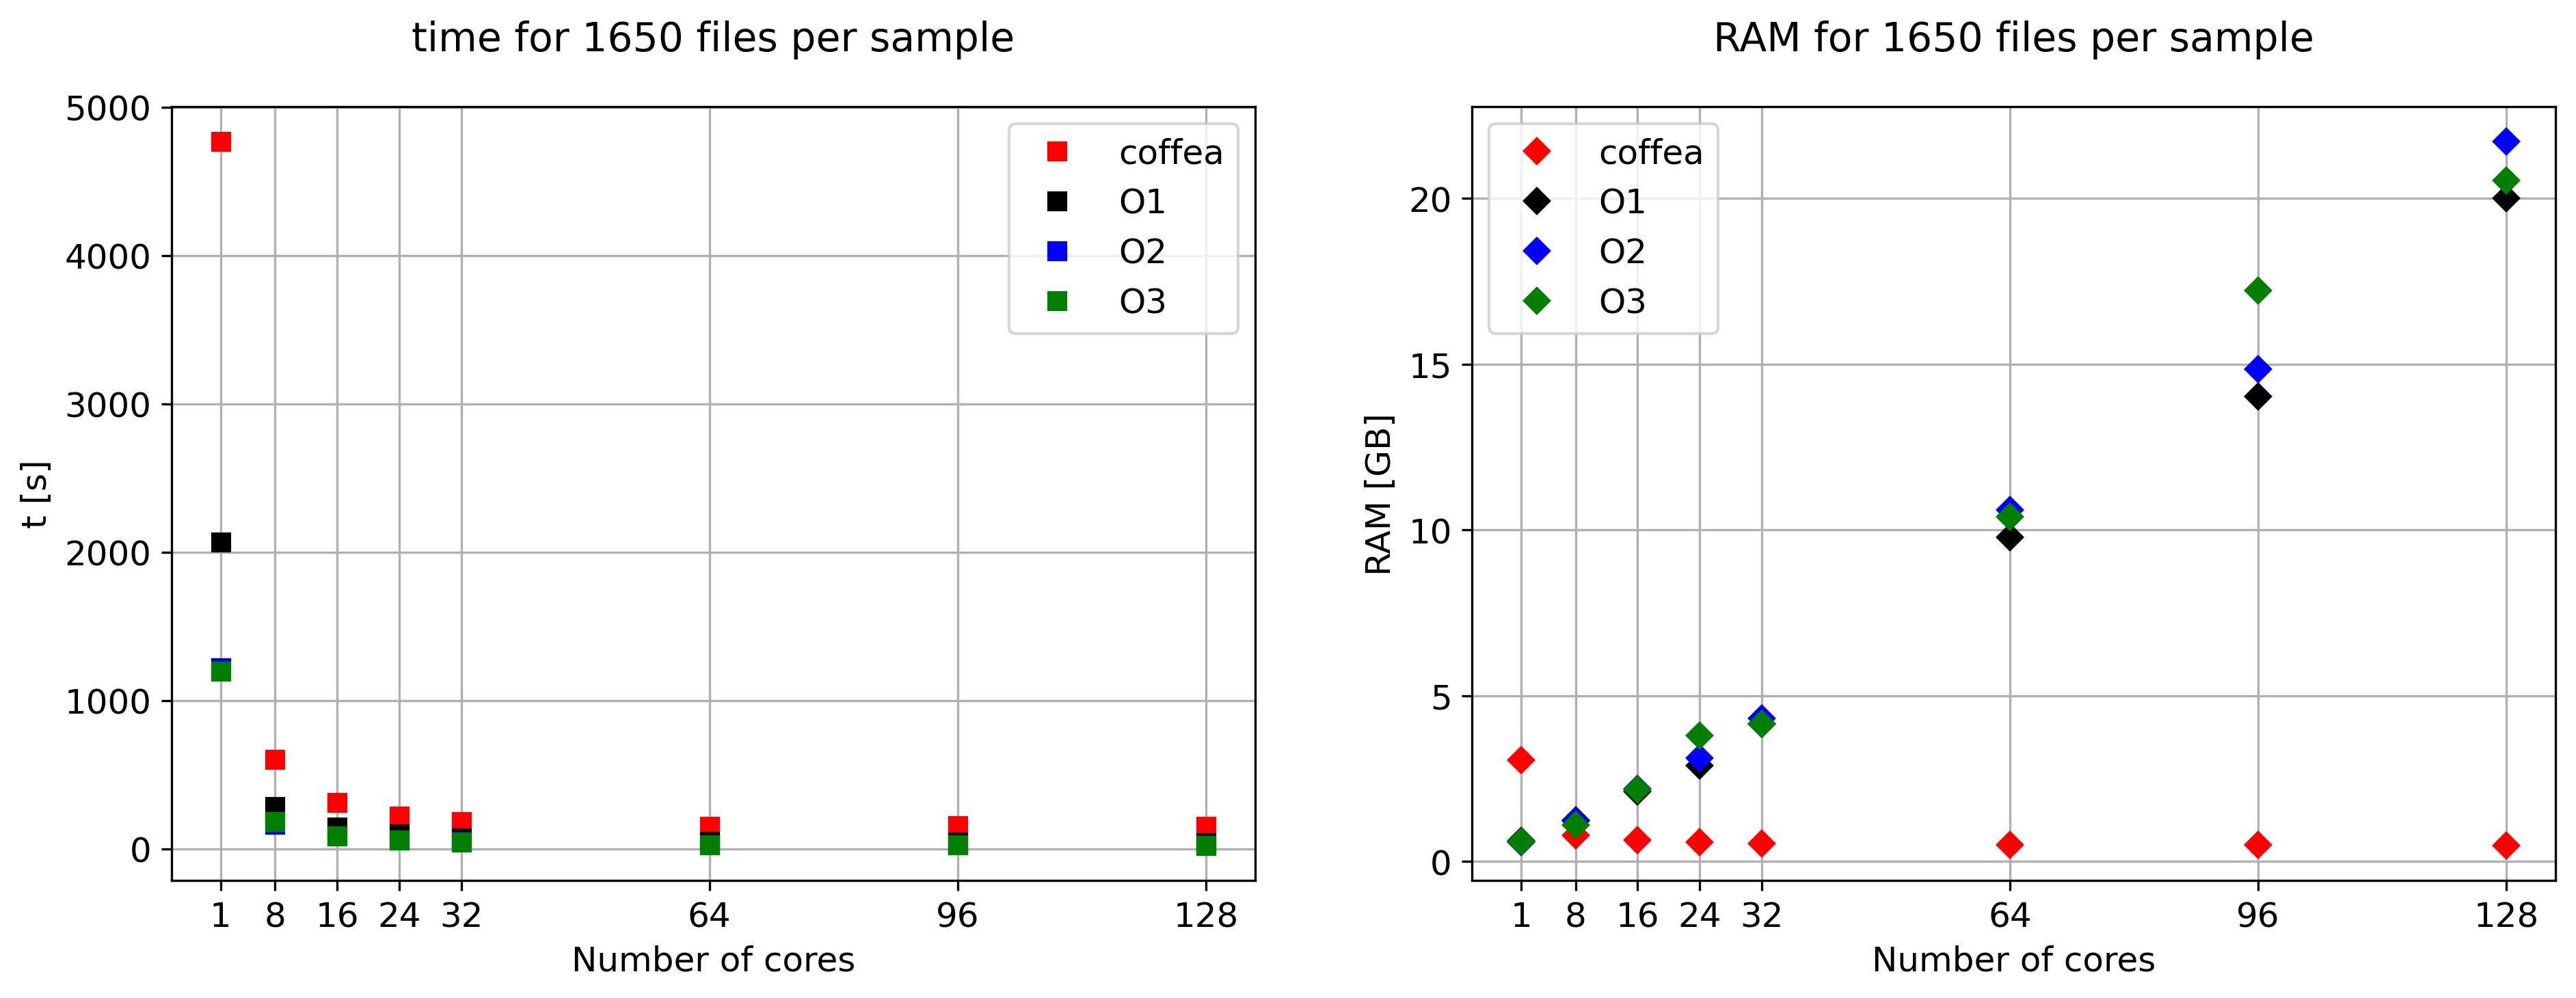

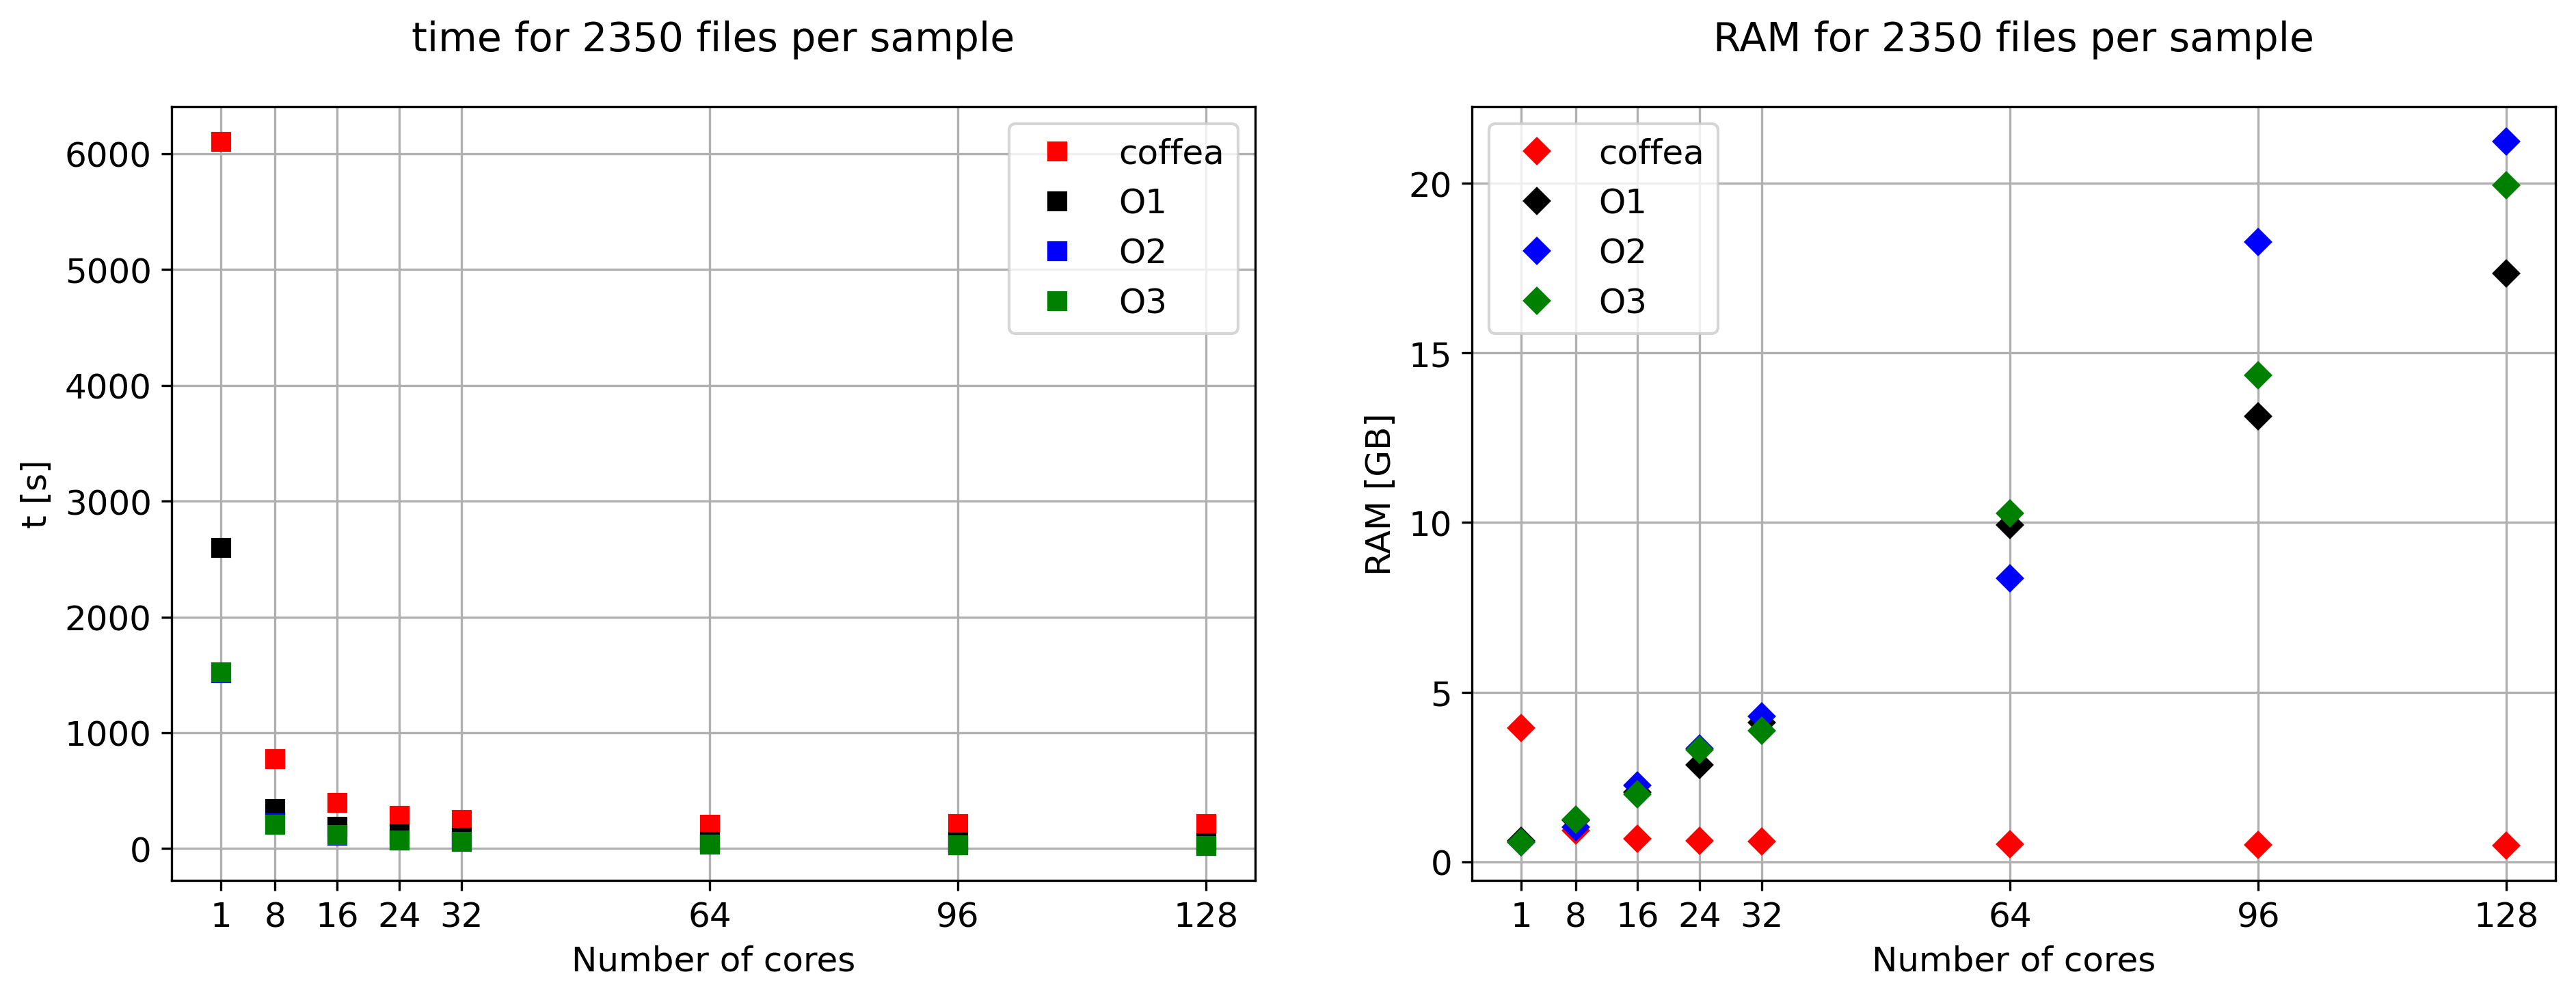

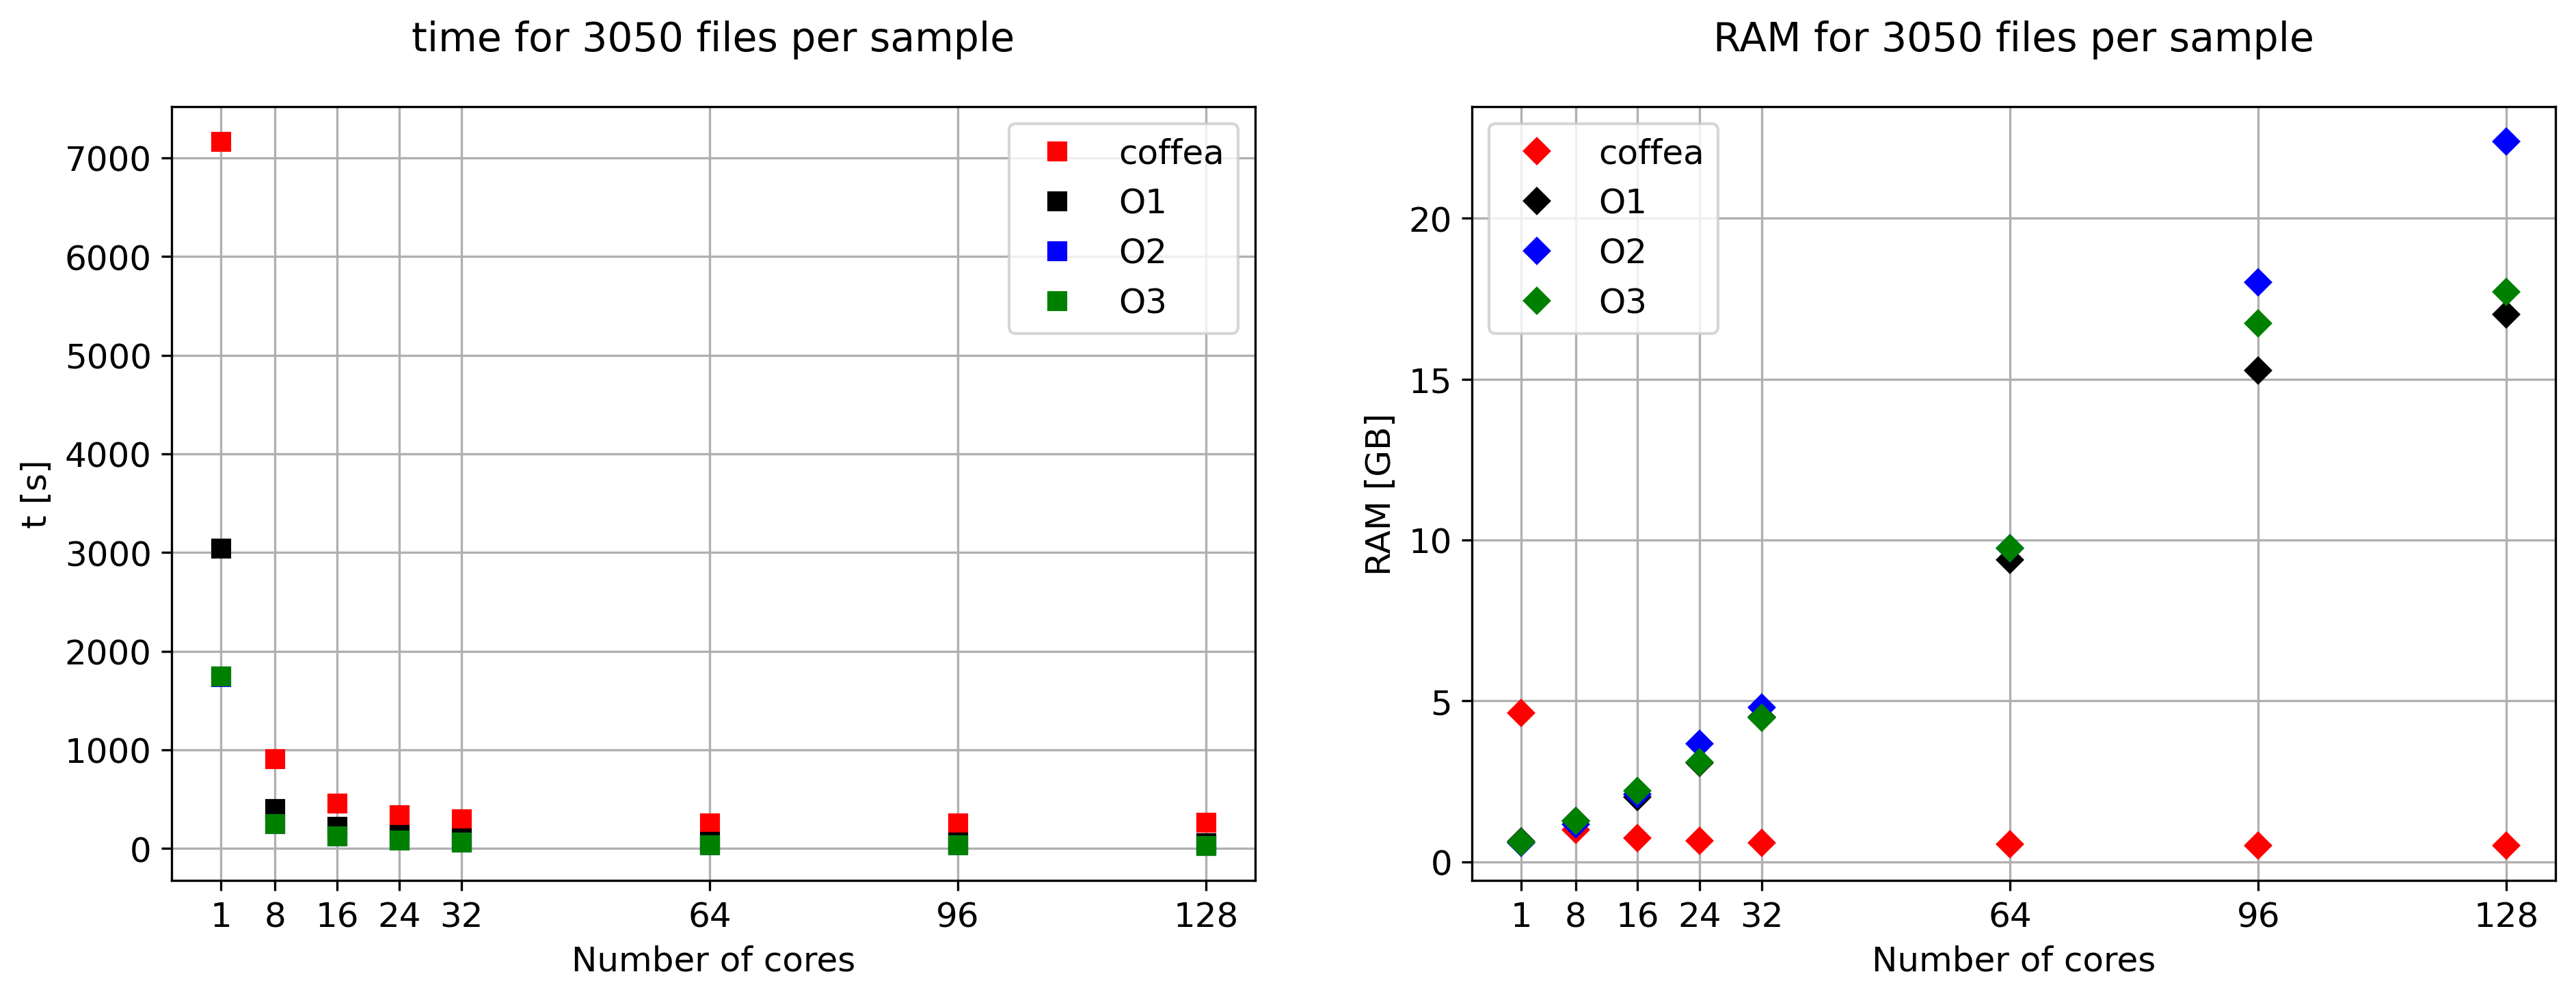

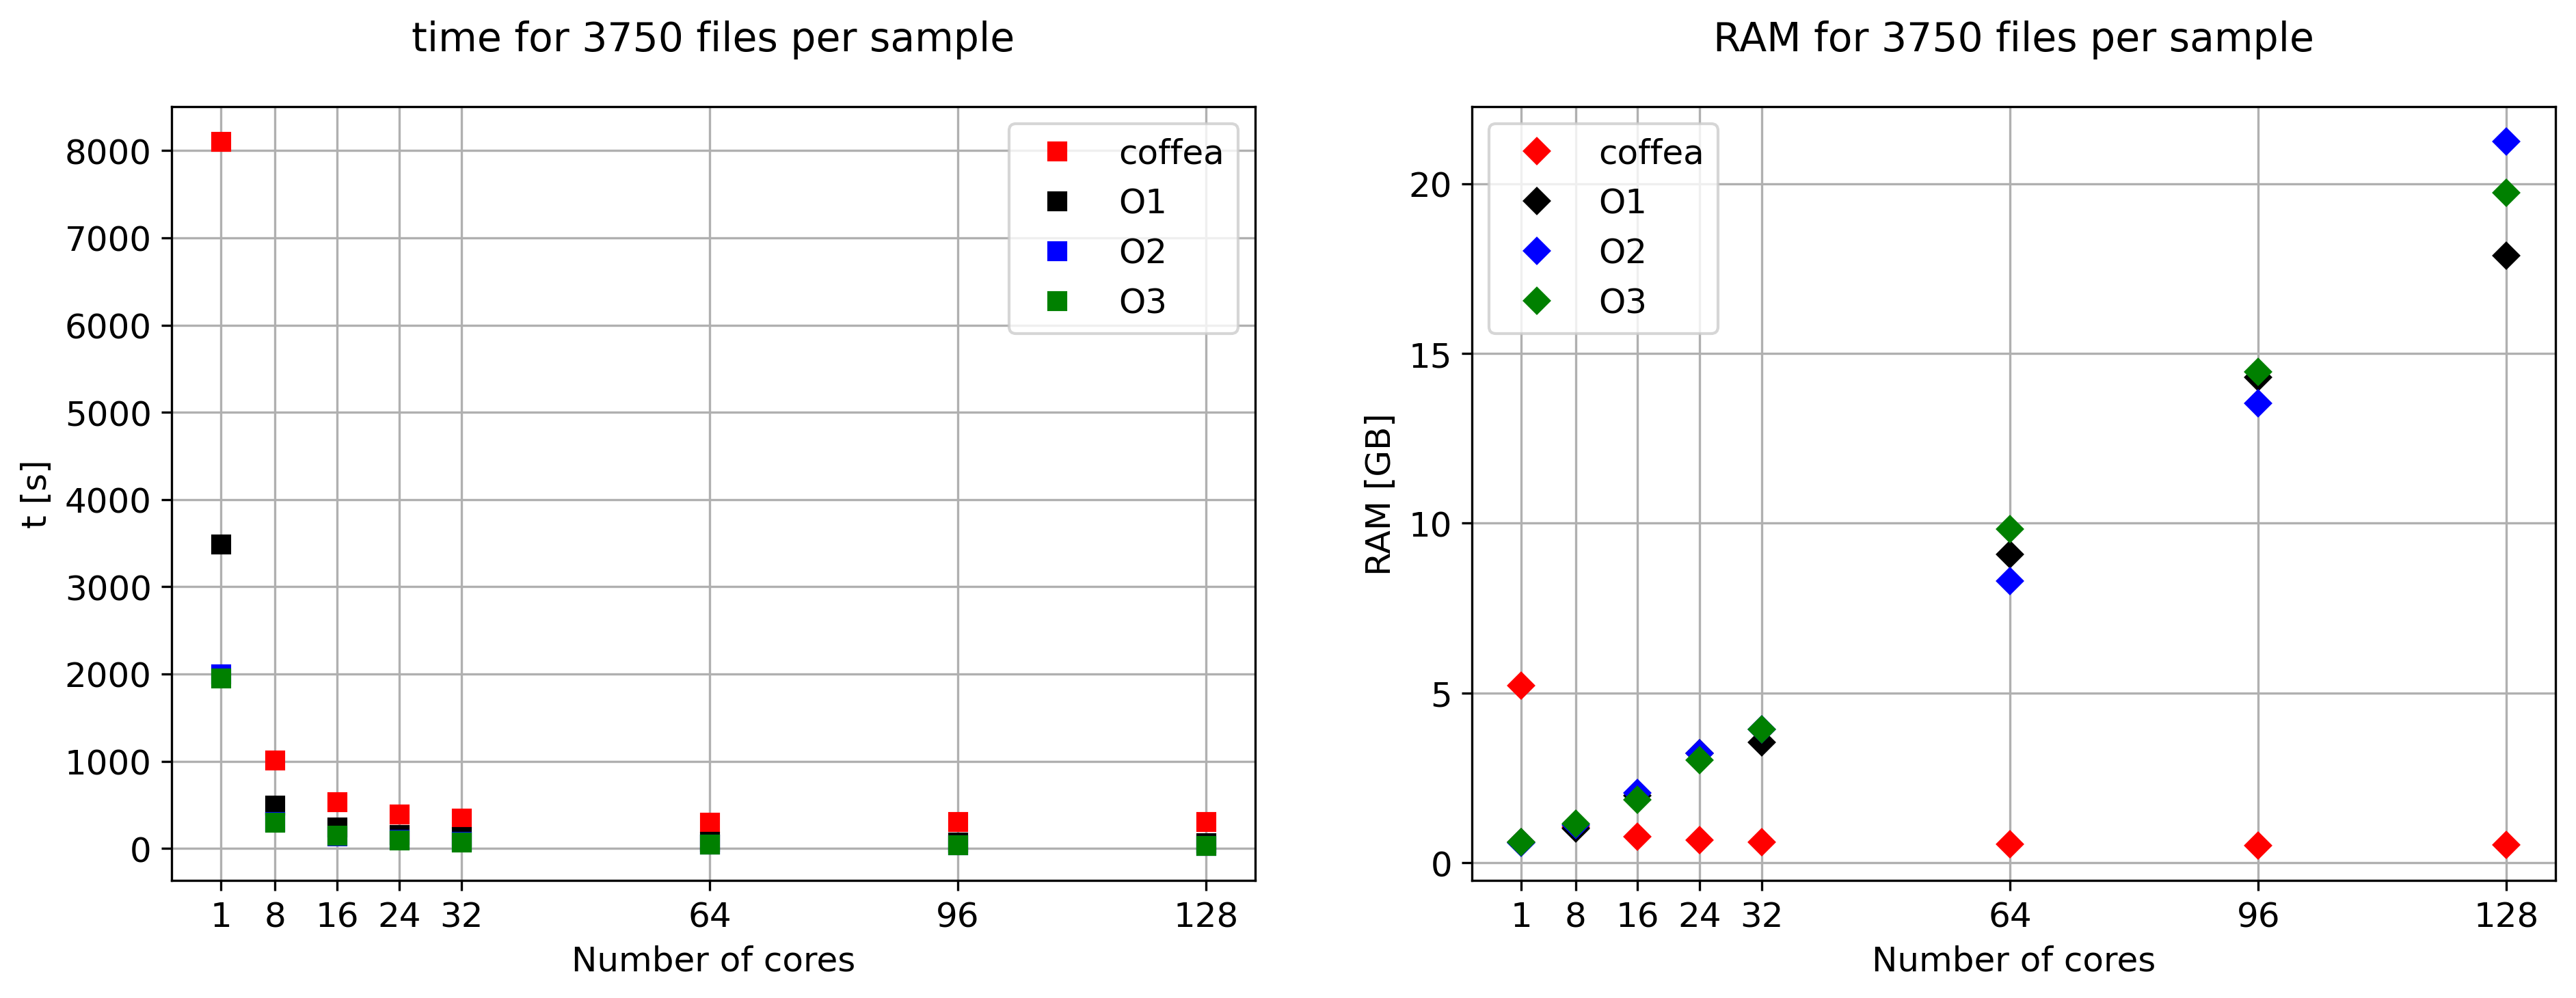

In [20]:
from matplotlib.backends.backend_pdf import PdfPages
pp = PdfPages('histograms/t_vs_core.pdf')
for nfiles in list(range(40, 161, 40)) + list(range(250, 3751, 700)):
    f = get_for_file(nfiles)
    pp.savefig(f)
pp.close()

In [24]:
def get_for_core(ncores):
    labels = ['coffea', 'O1', 'O2', 'O3']
    colors = ['r', 'k', 'b', 'g']
    colors = {labels[i]:colors[i] for i in range(len(labels))}
    nn = [list(range(40, 161, 40)) + [250], list(range(250, 3751, 700))]
    fig, ax = plt.subplots(2,2, figsize=(15,12))
    for i in range(2):
        n = nn[i]
        axs = ax[i]
        for label in labels:
            t = []
            mem = []
            for nfiles in n:
                file = f'benchmarks/{nfiles}/{label}/1/1'
                with open(file, 'r') as f:
                    for line in f.readlines():
                        if (label == 'coffea'):
                            if 'execution took' in line:
                                time = float(line.split()[2])
                                t.append(time)
                        else:
                            if 'RunGraphs' in line and 'elapsed' in line:
                                time = float(line.split()[-2][0:-1])
                                t.append(time)
                        if 'maxresident' in line:
                            ram = int(line.split()[-1].split('maxresident')[0])
                            mem.append(ram)
            axs[0].plot(n, t, f'{colors[label]}s', label = label)
            mem = np.array(mem)/1e6 if label=='coffea' else np.array(mem)/1e6
            if label == 'coffea': axs[1].plot(n, mem, f'{colors[label]}D', label = label+' [100 MB]')
            else: axs[1].plot(n, mem, f'{colors[label]}D', label = label)



        axs[0].set_xlabel('Number of files')
        axs[0].set_ylabel('t [s]')
        axs[0].grid()
        axs[0].set_xticks(n)
        # ax[0].set_yticks(list(range(0, 1100, 100)))
        #ax[0].yaxis.set_major_formatter(ticker.ScalarFormatter(useOffset=False))
        axs[0].legend()
        axs[0].set_title(f'time at {ncores} core', fontsize=14, x=0.5, y=1.00)
        # ax[0].set_ylim([0,360])

        axs[1].set_xlabel('Number of files')
        axs[1].set_ylabel('RAM [GB]')
        axs[1].grid()
        axs[1].set_xticks(n)
        axs[1].legend()
        axs[1].set_title(f'RAM at {ncores} core', fontsize=14, x=0.5, y=1.00)



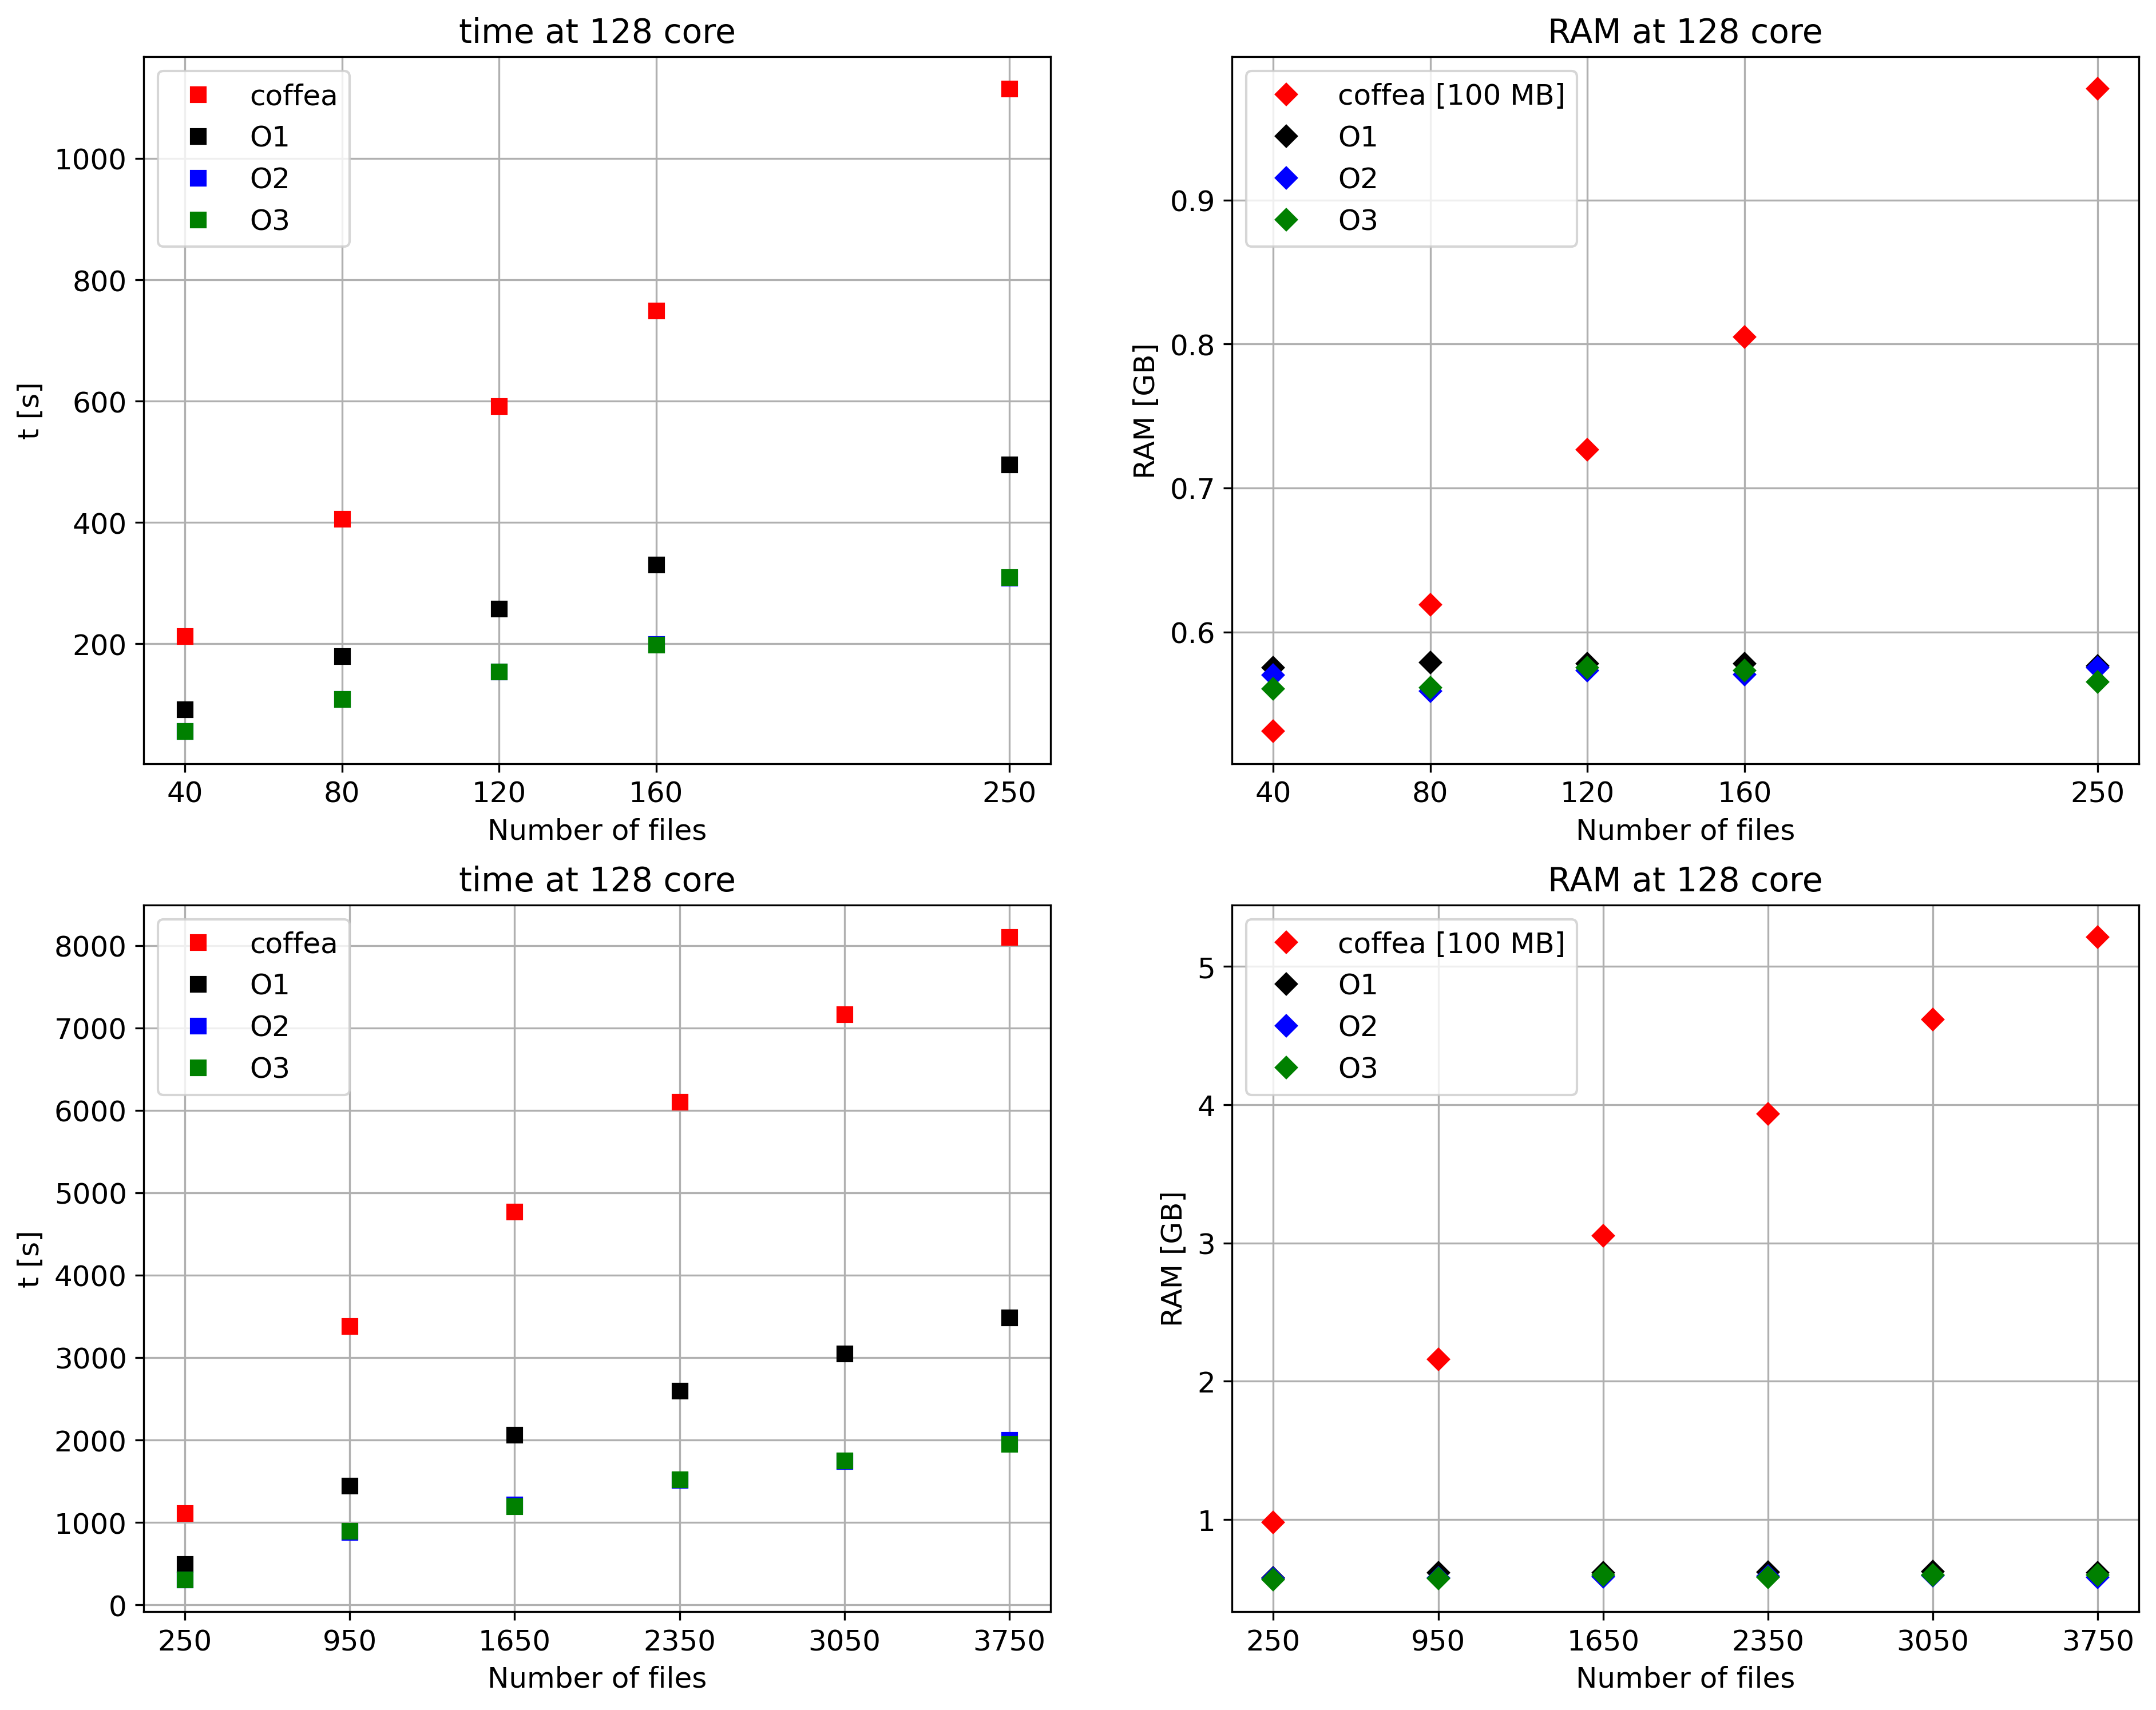

In [25]:
fig = get_for_core(128)

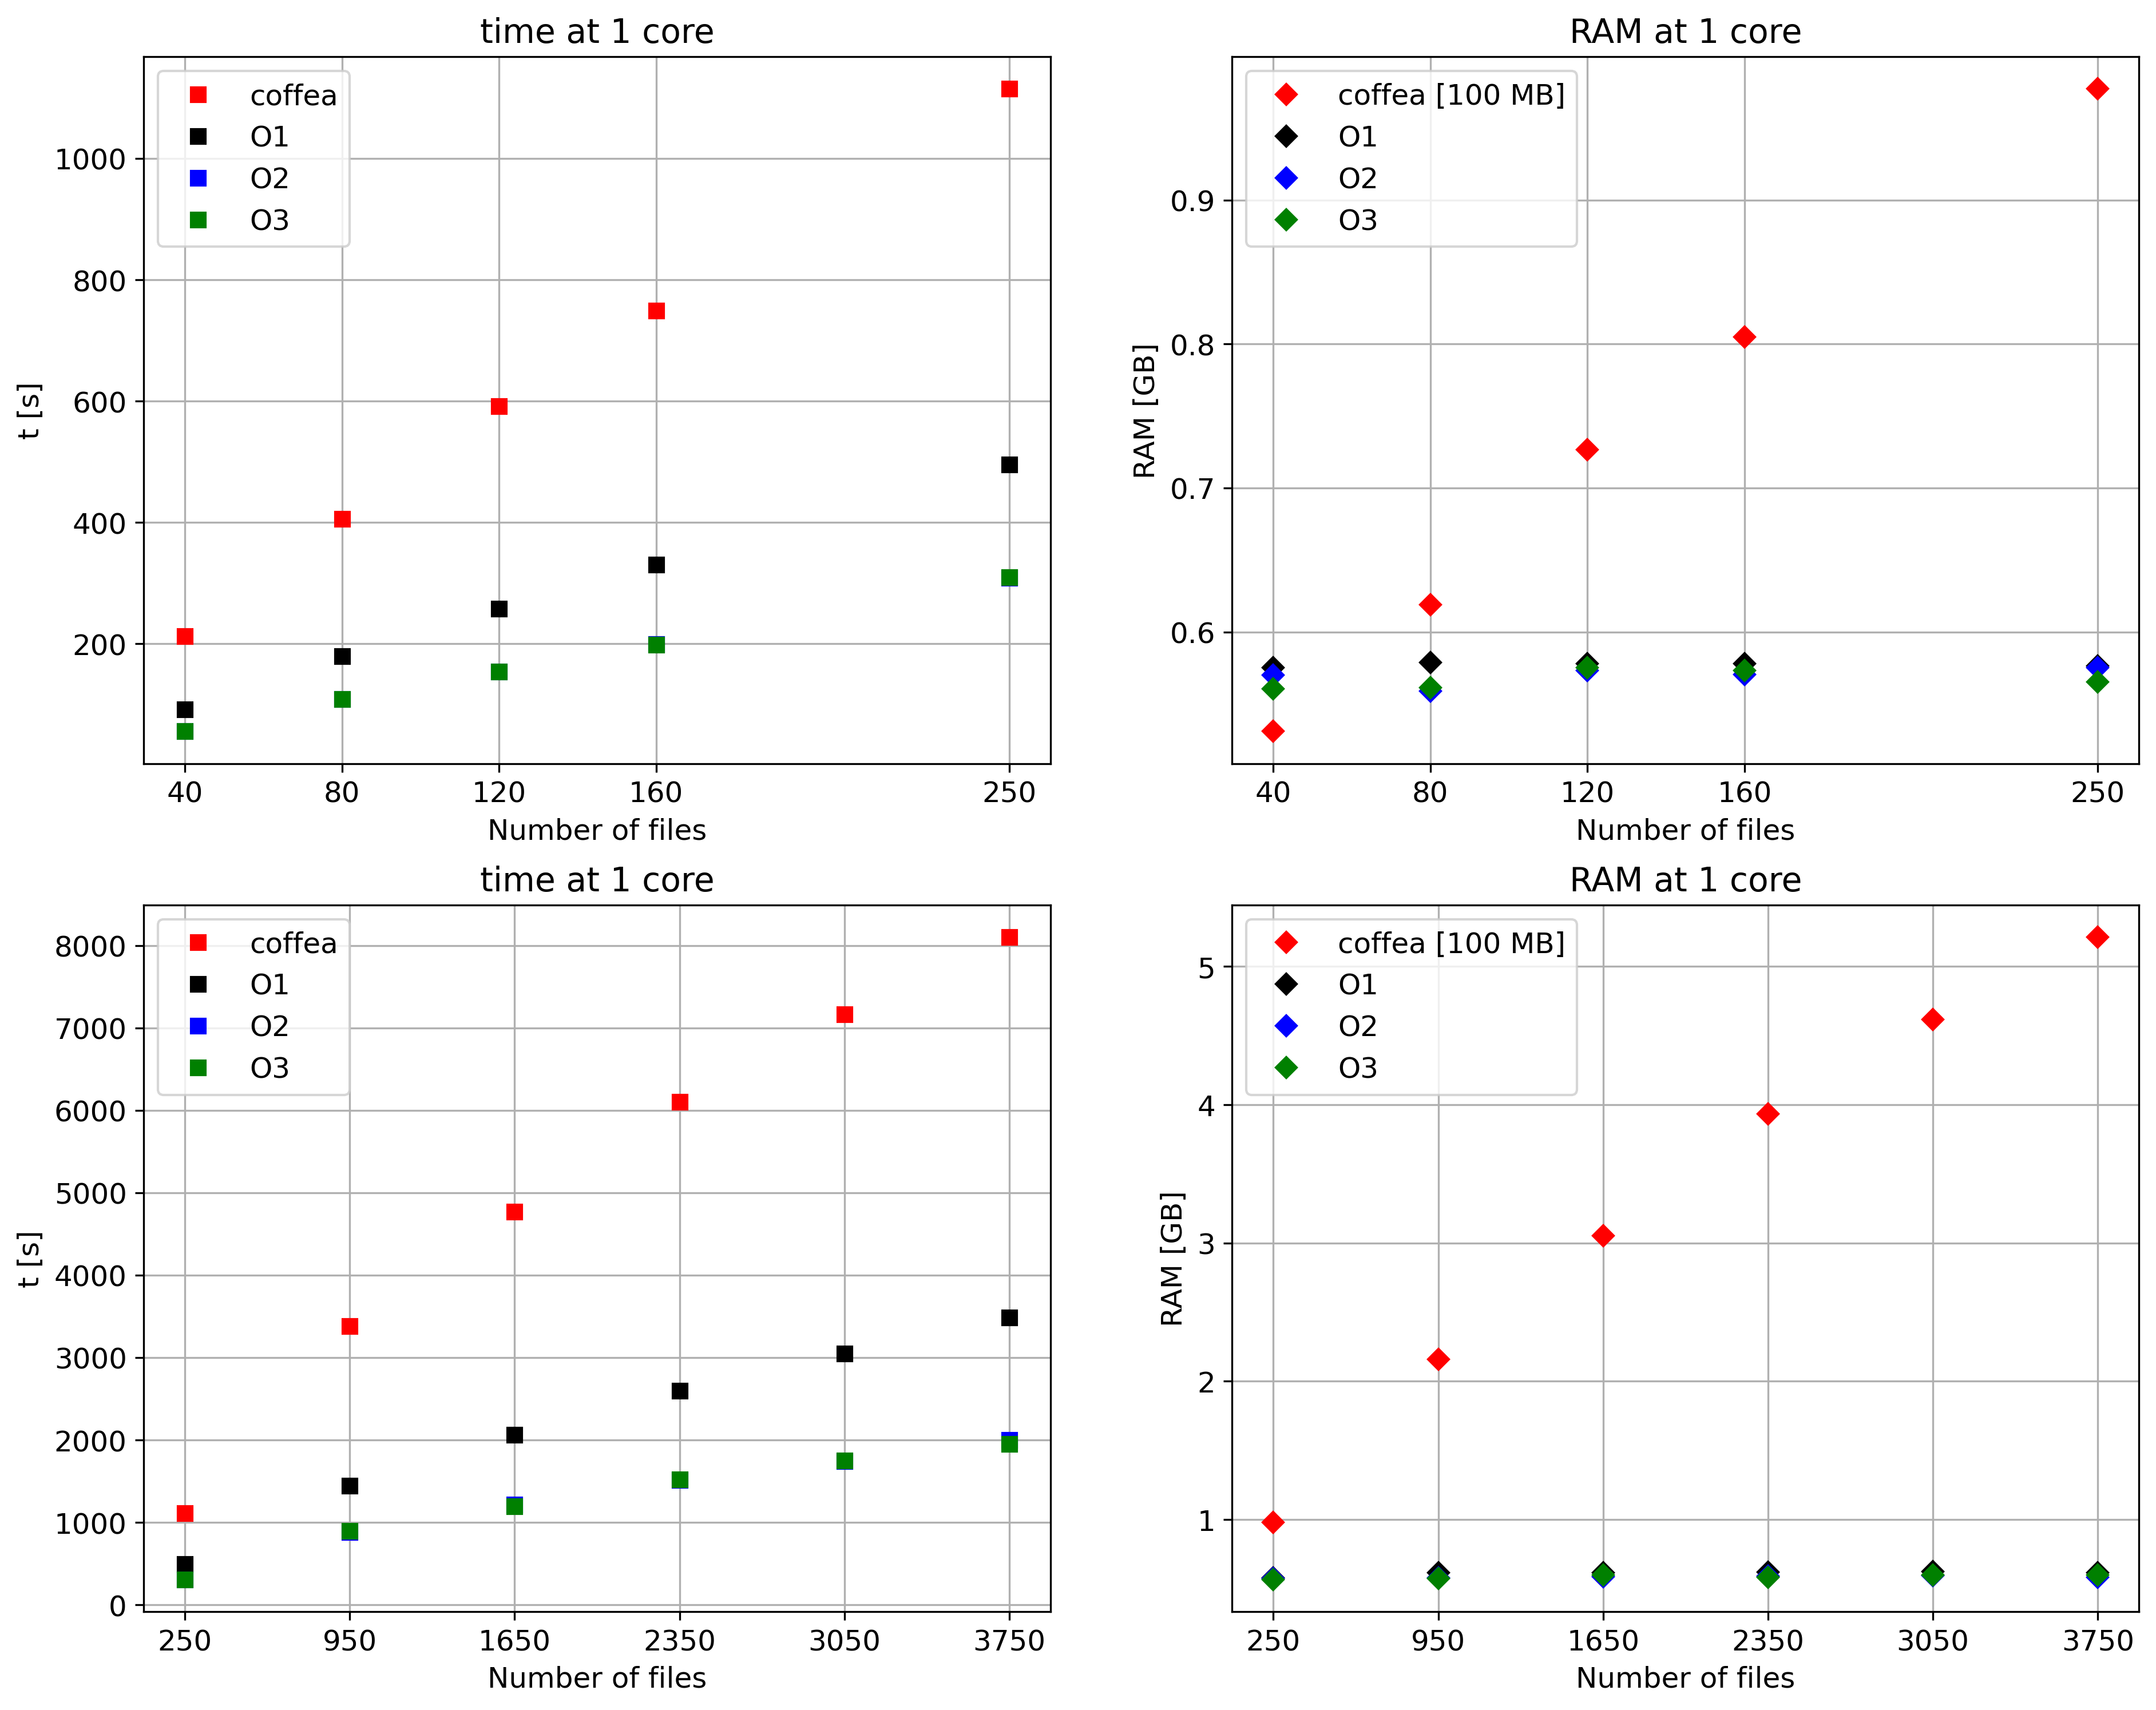

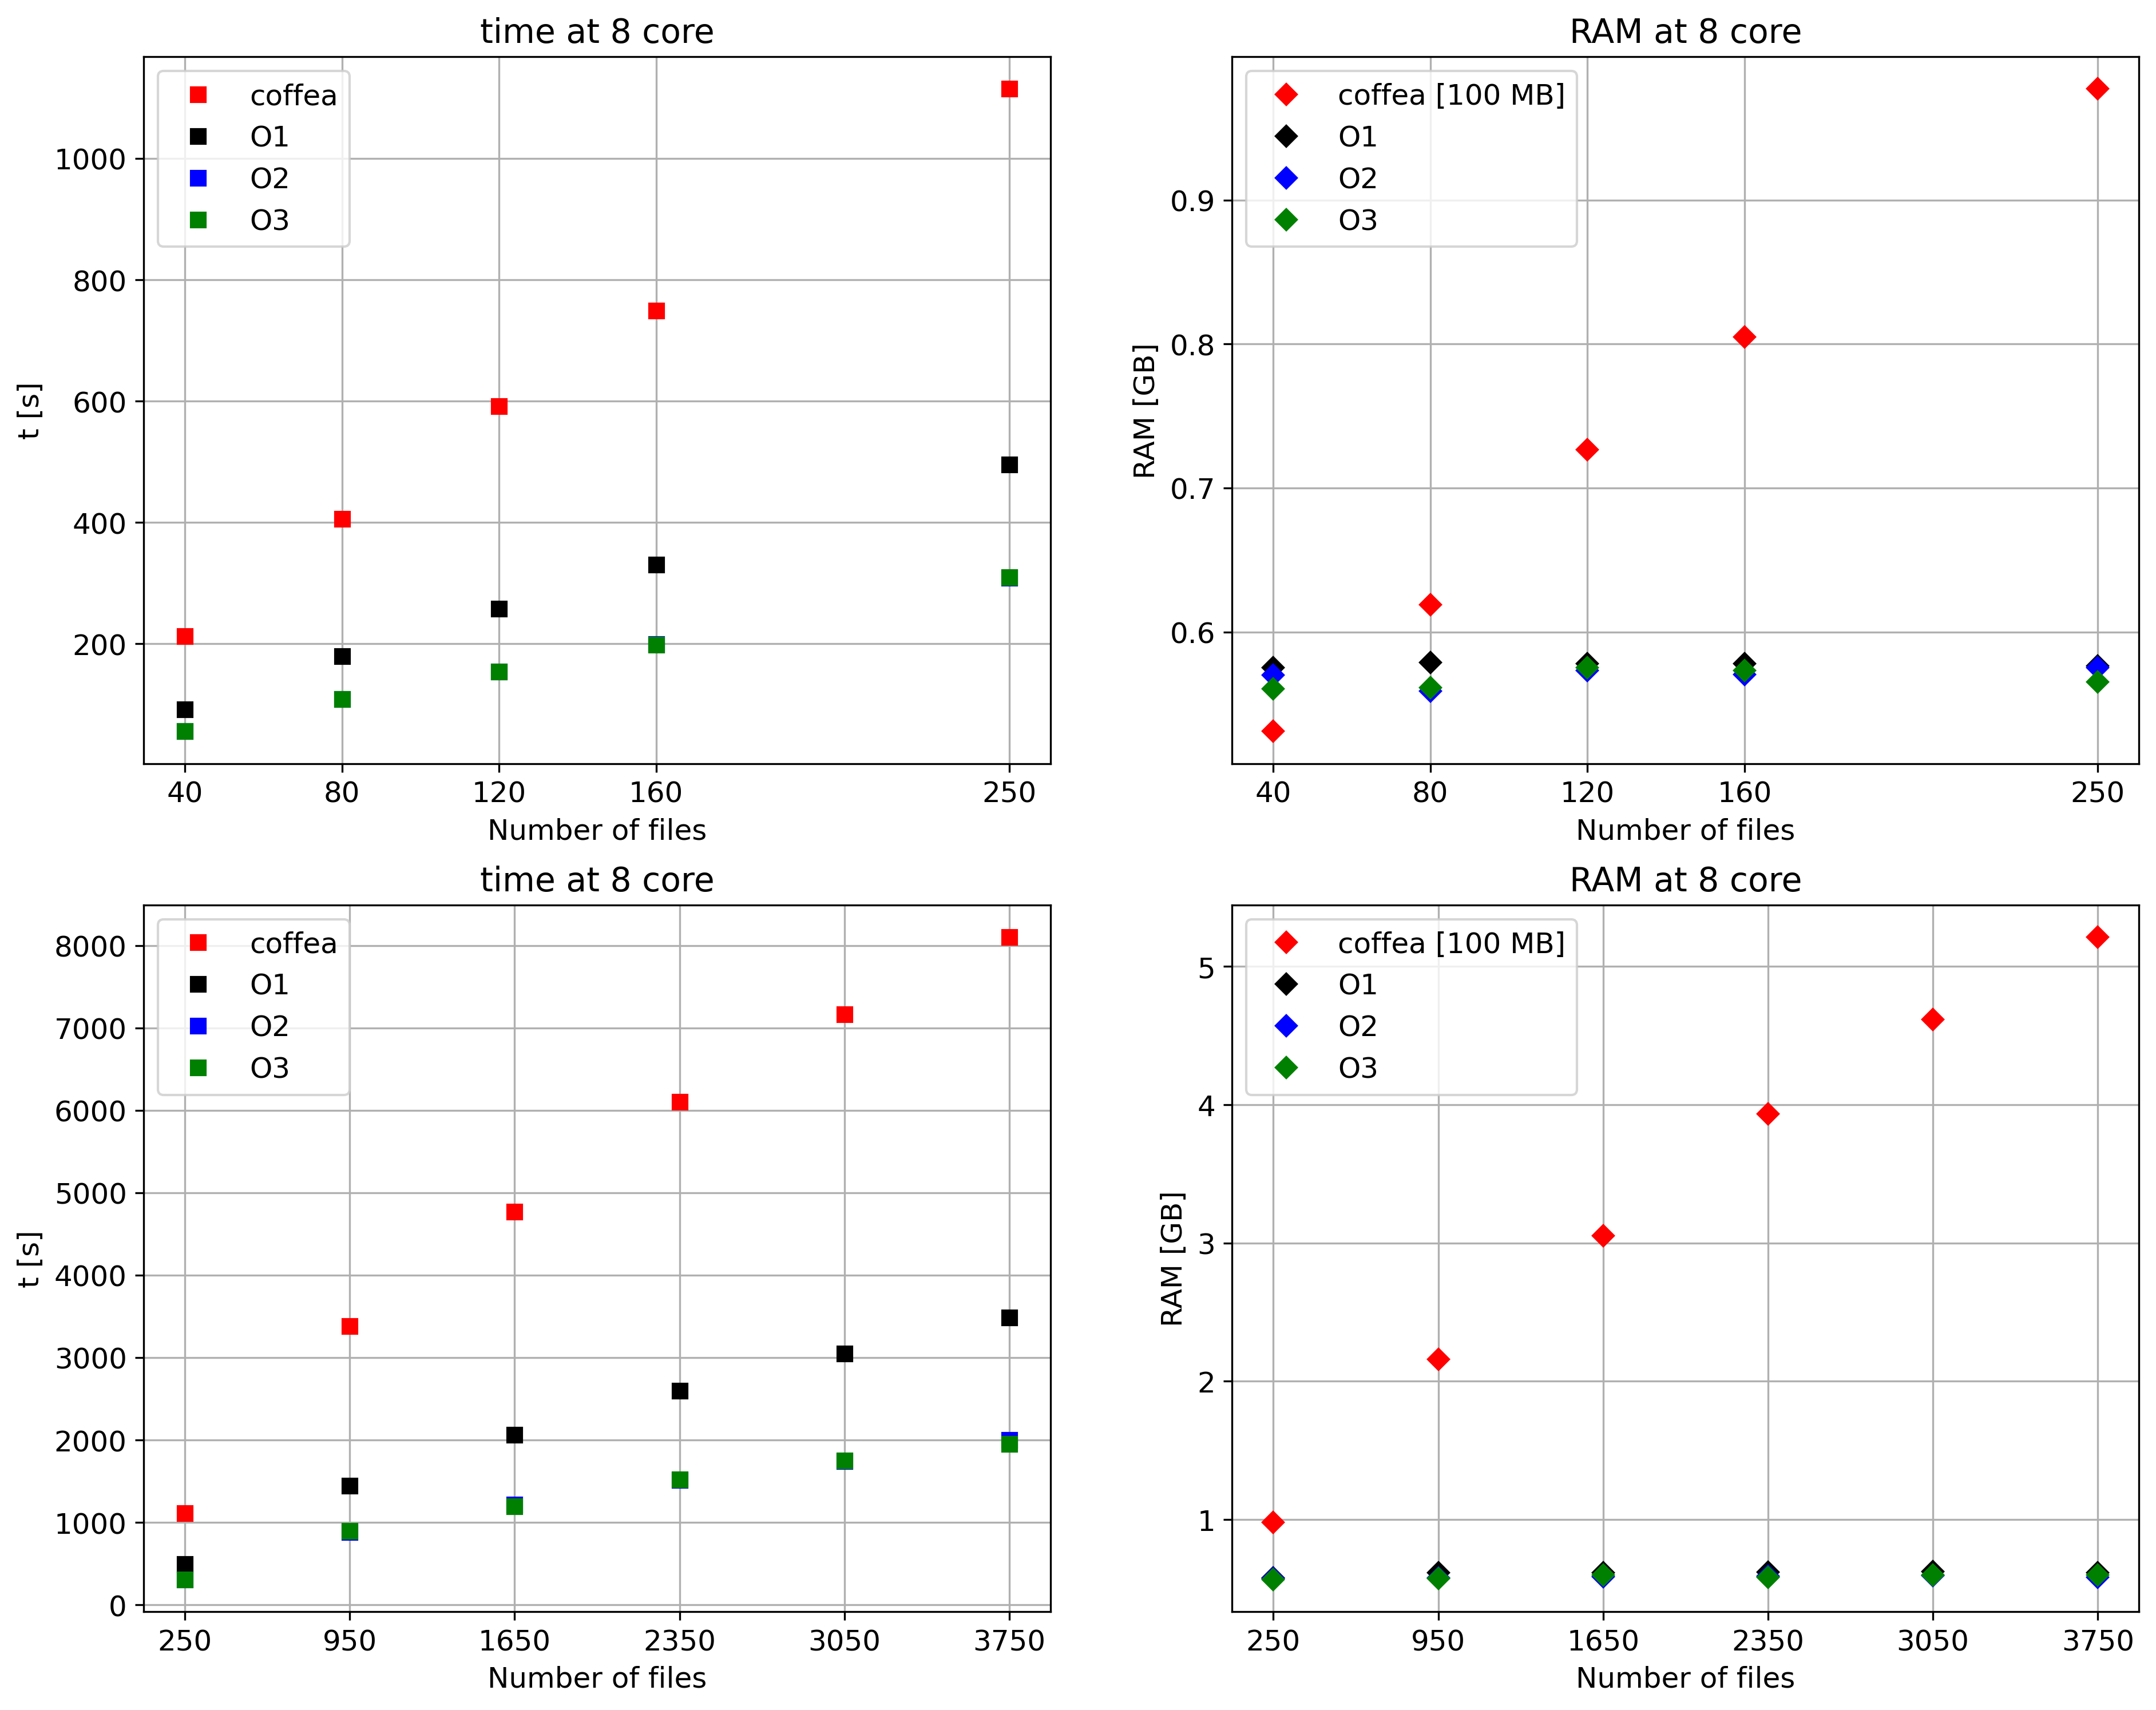

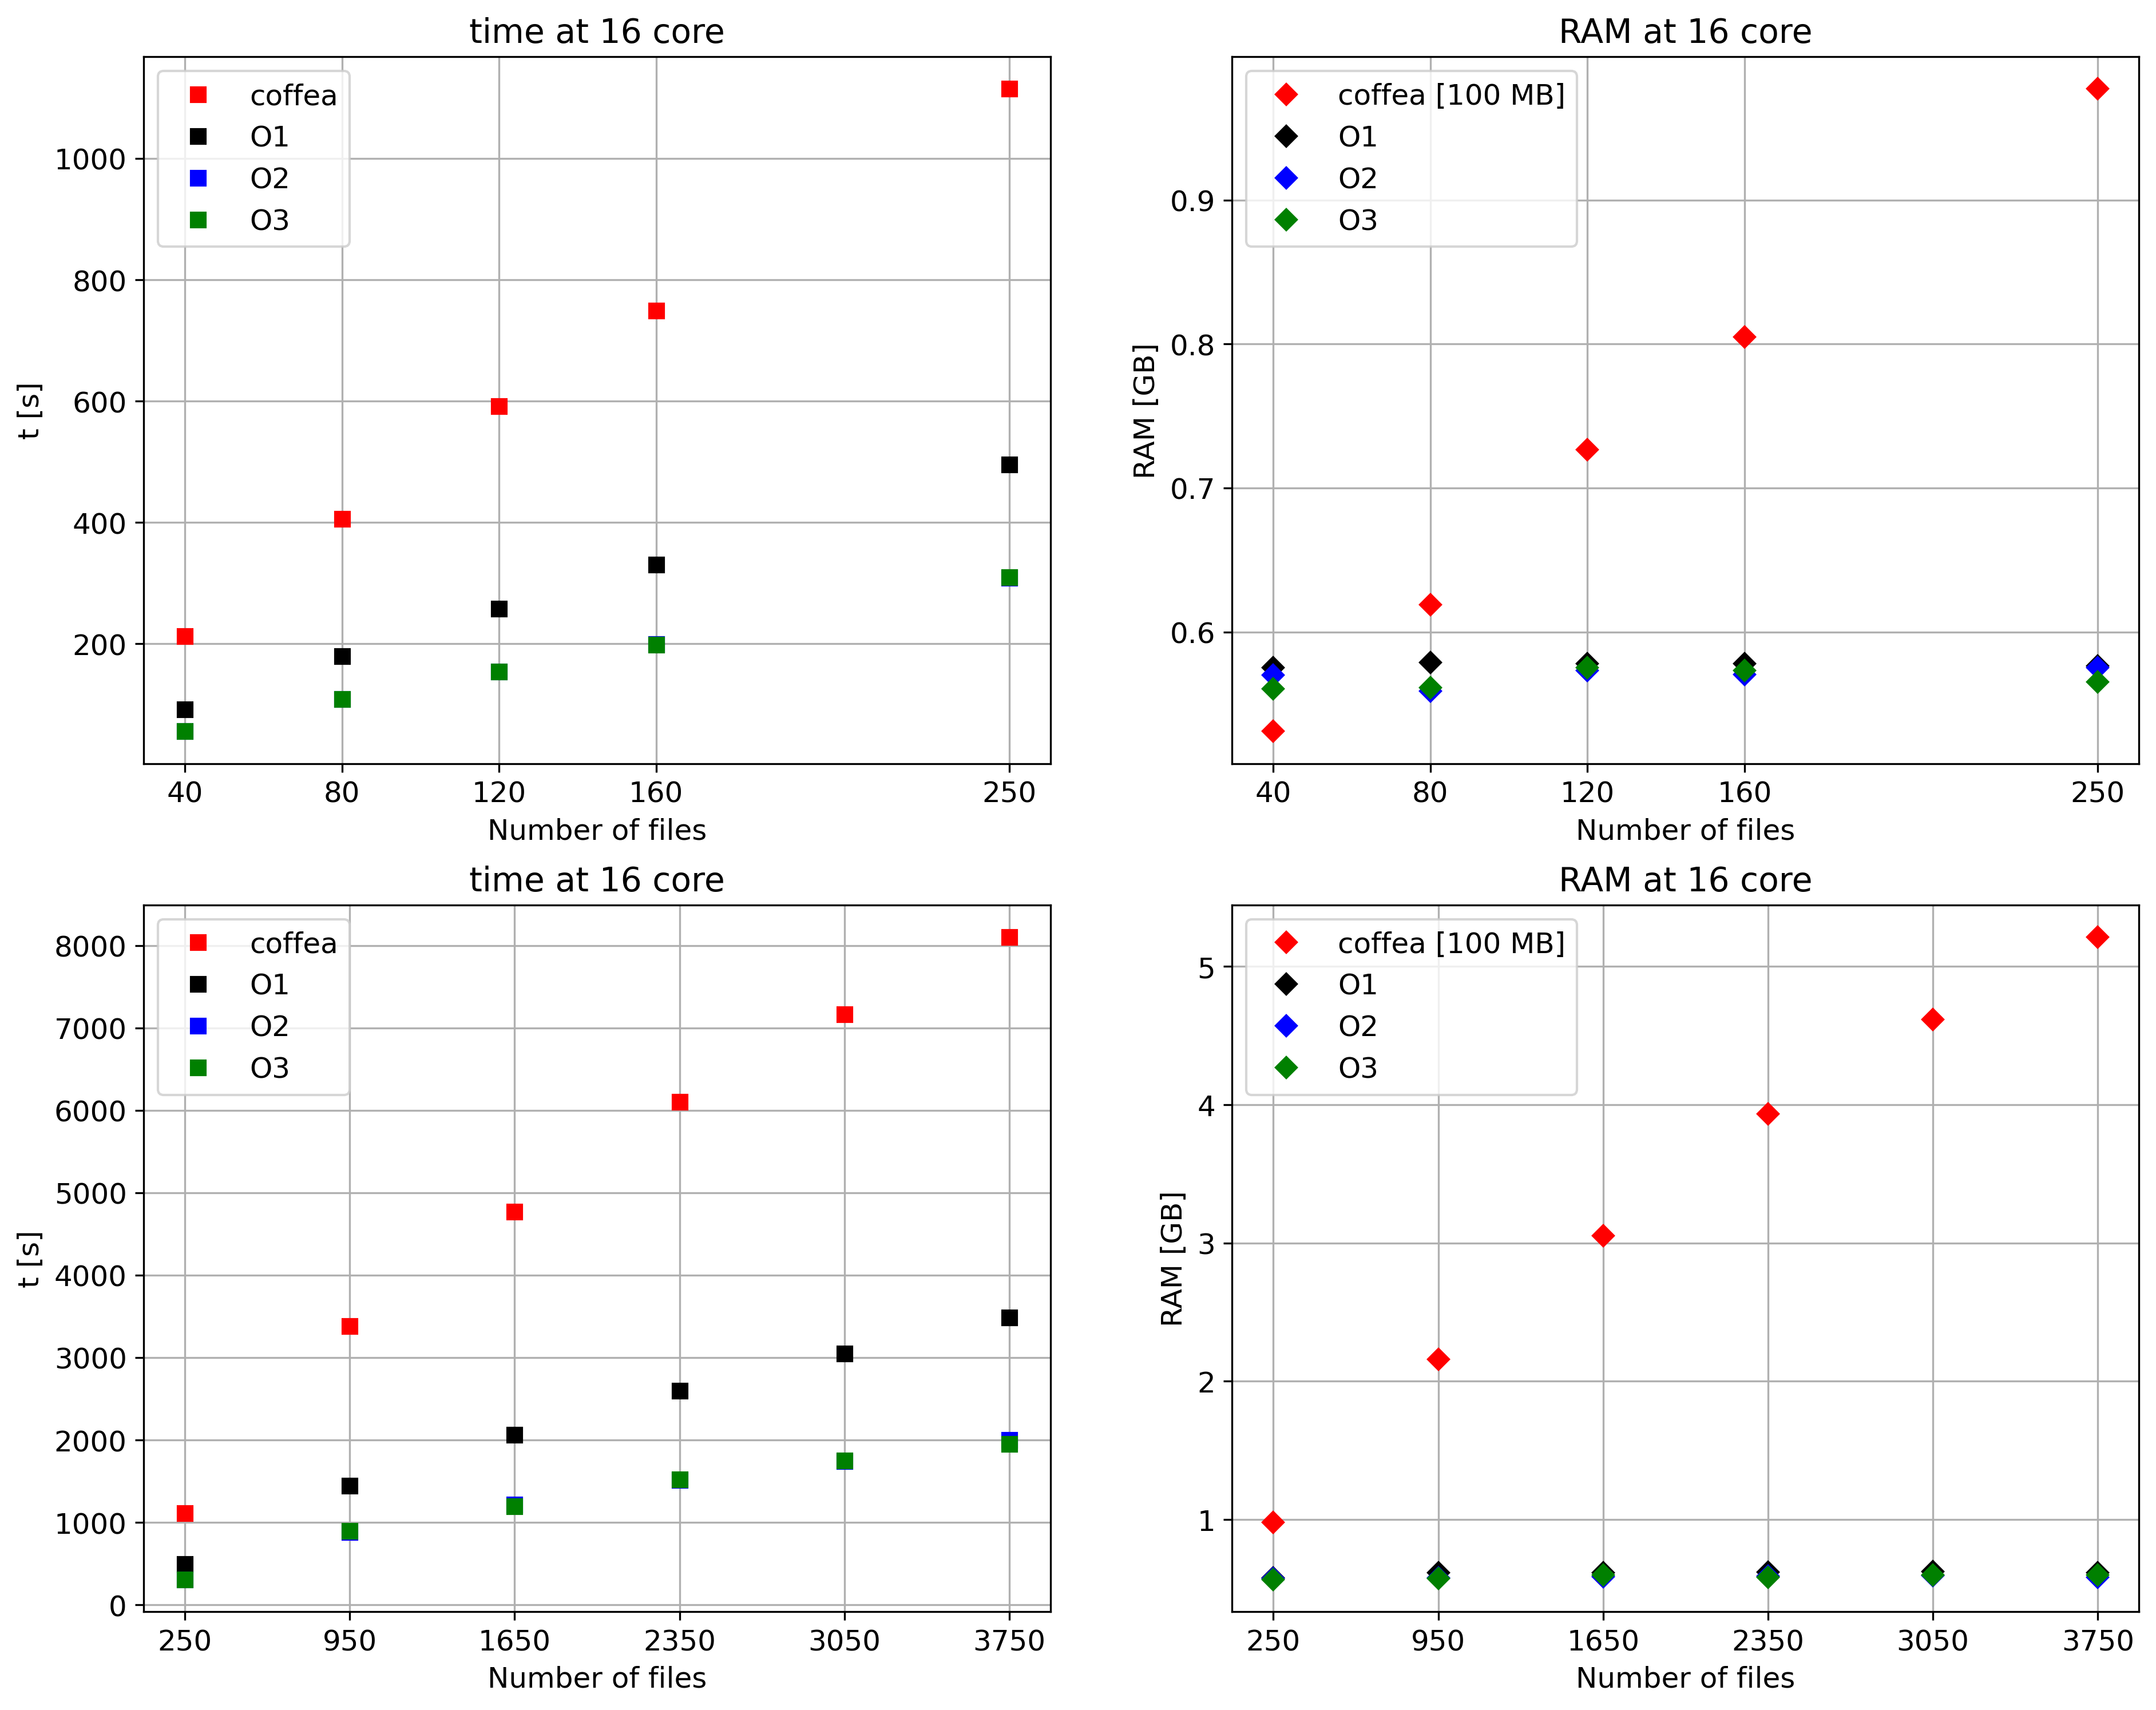

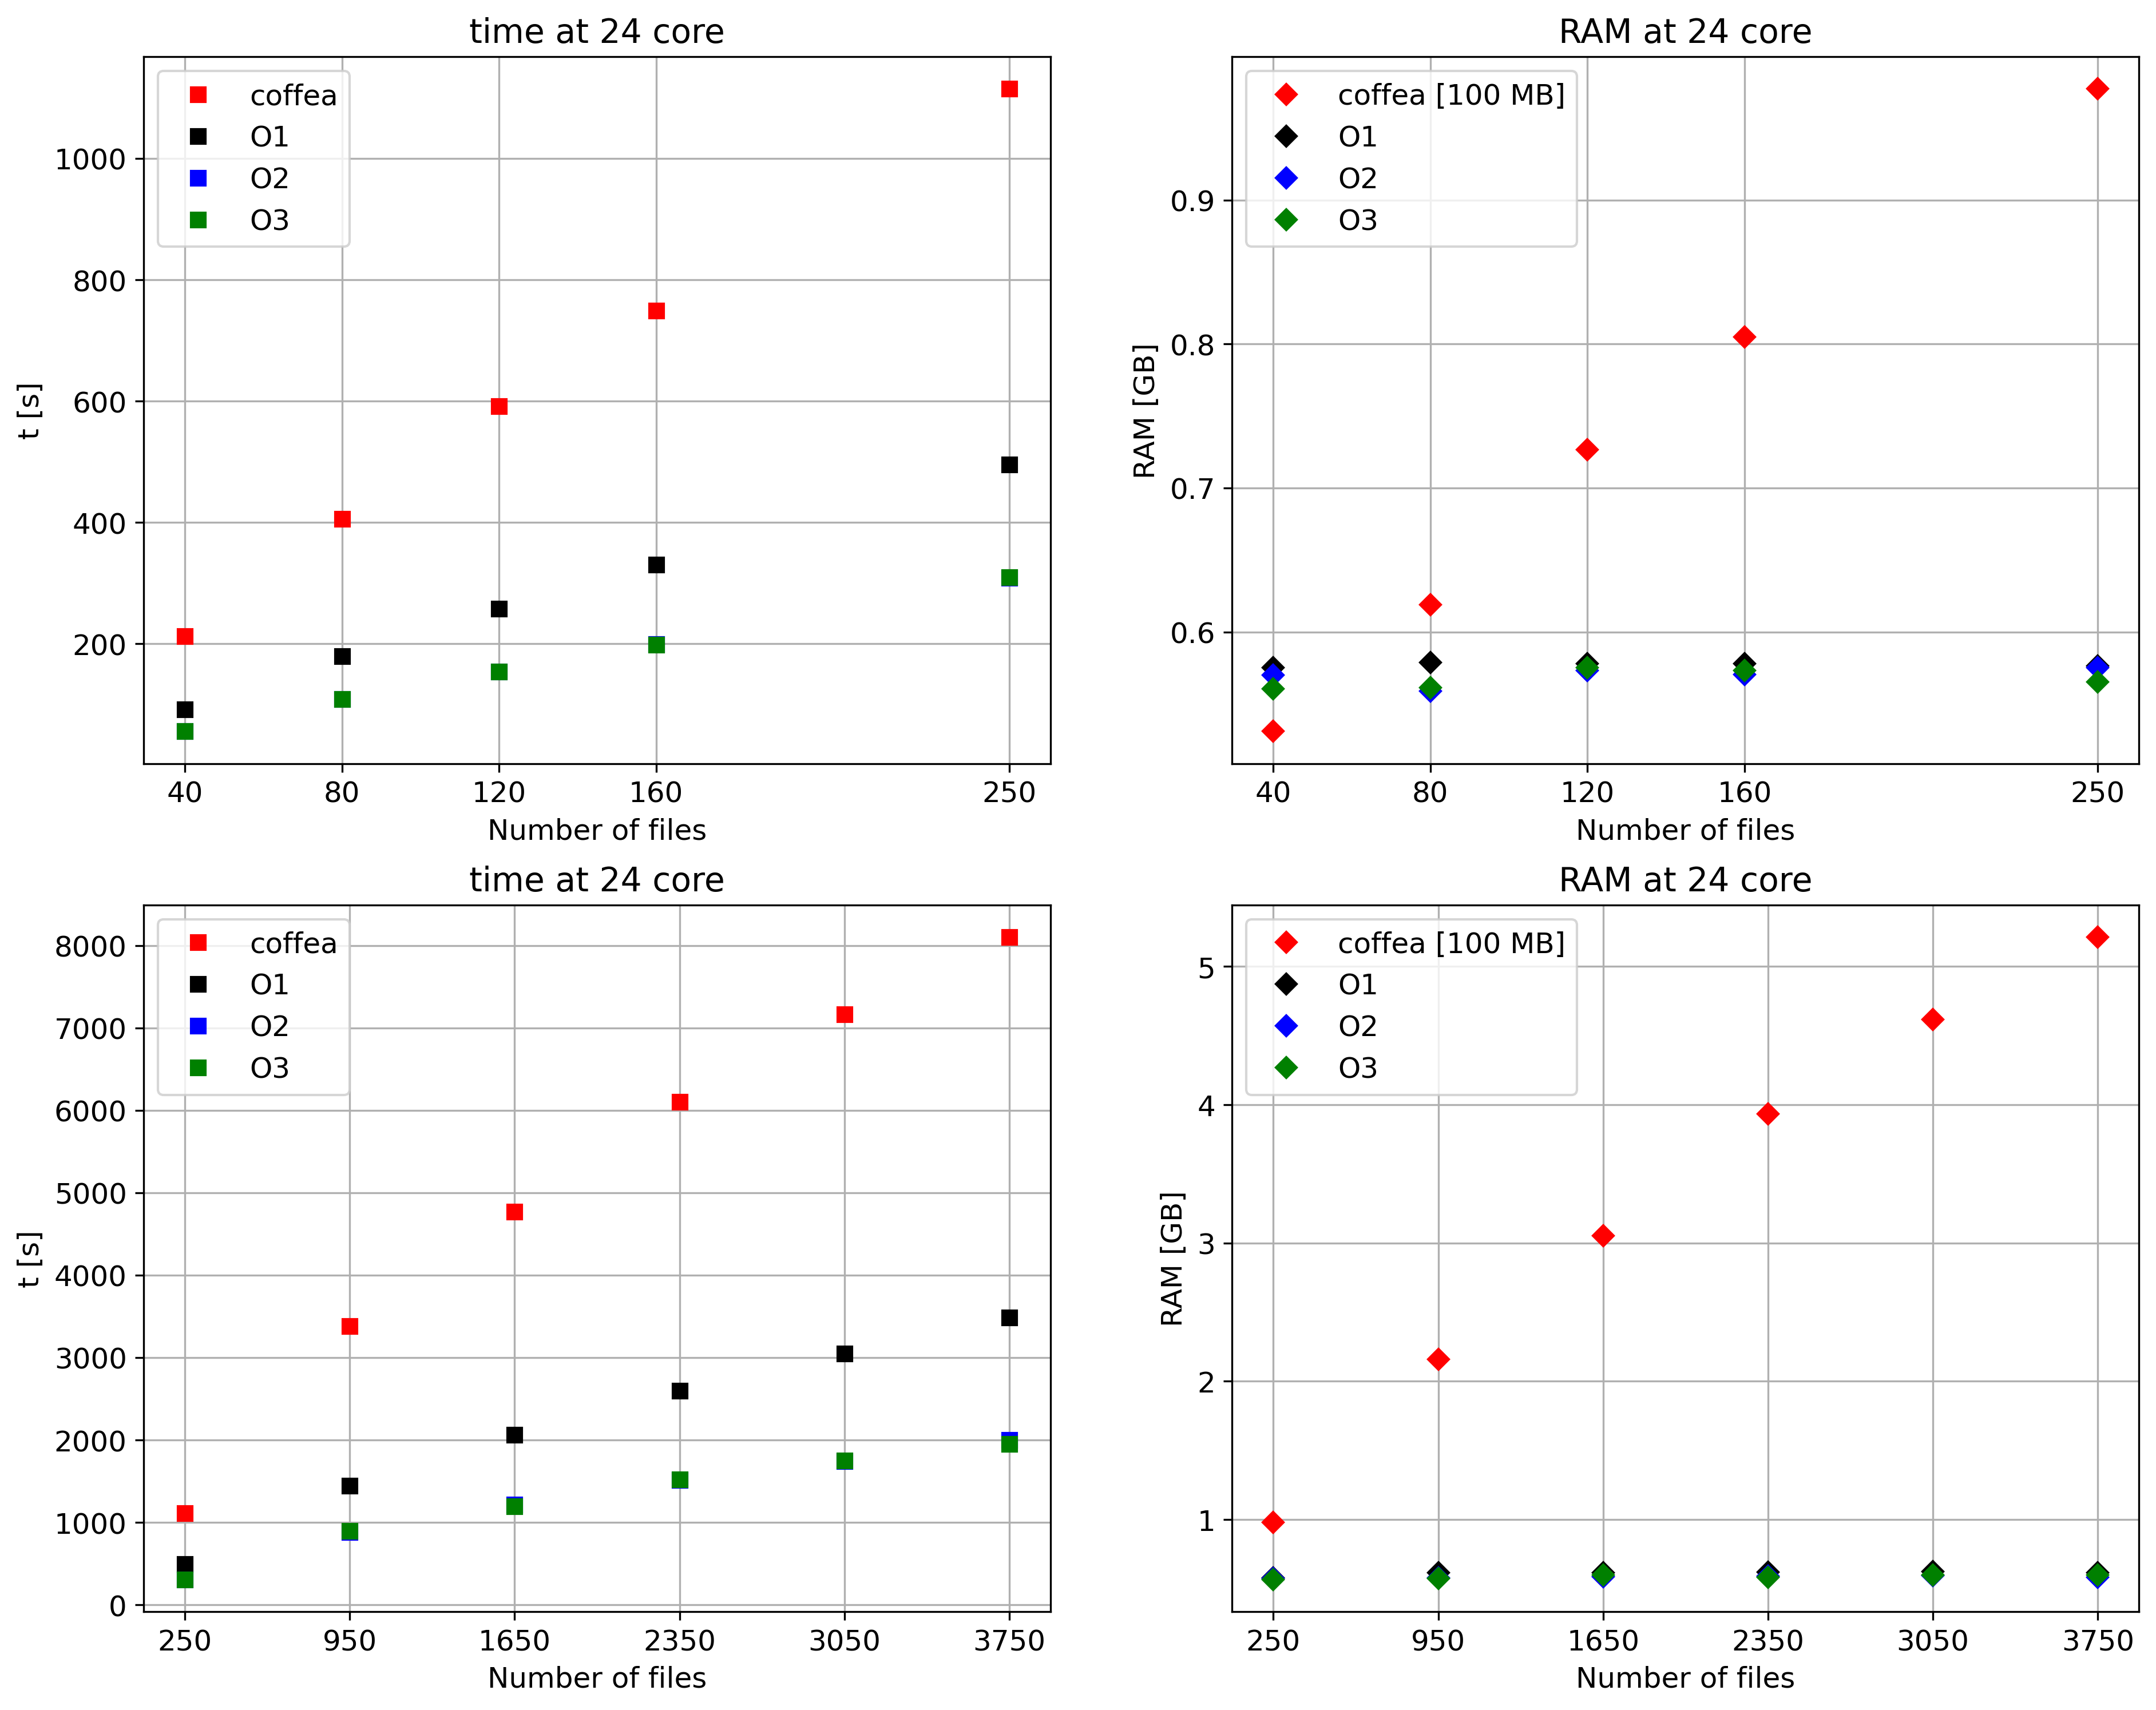

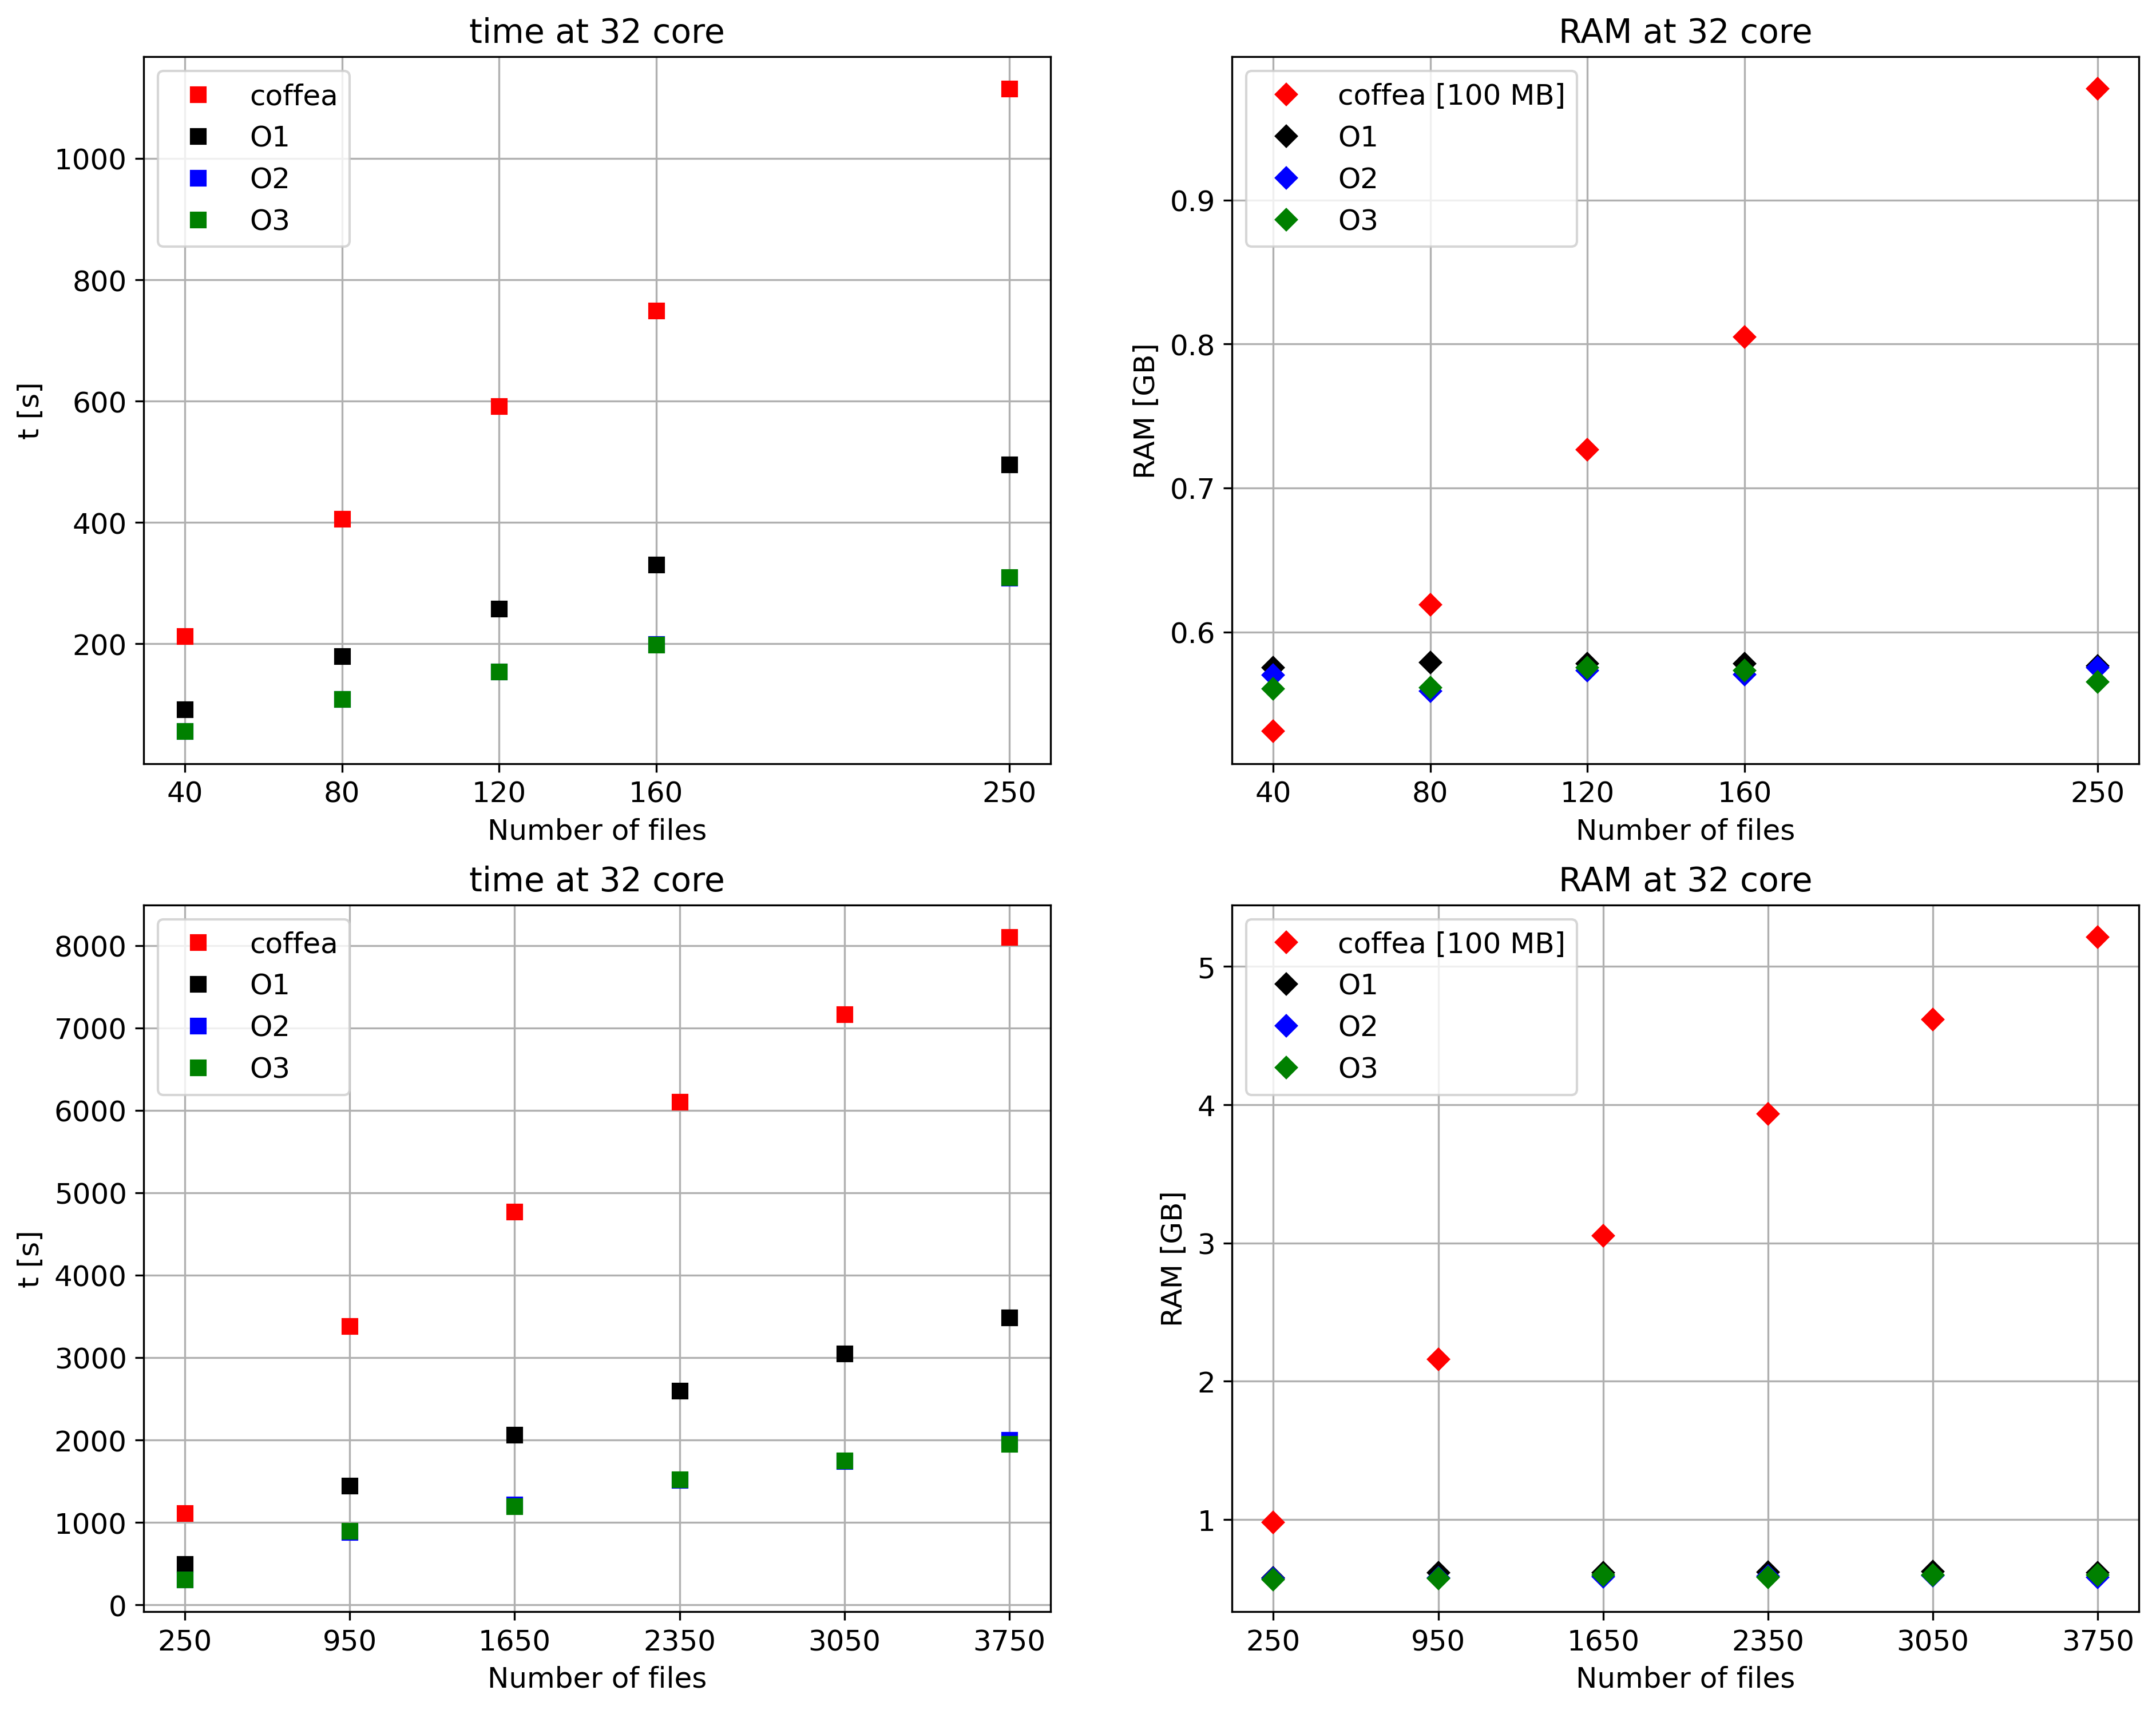

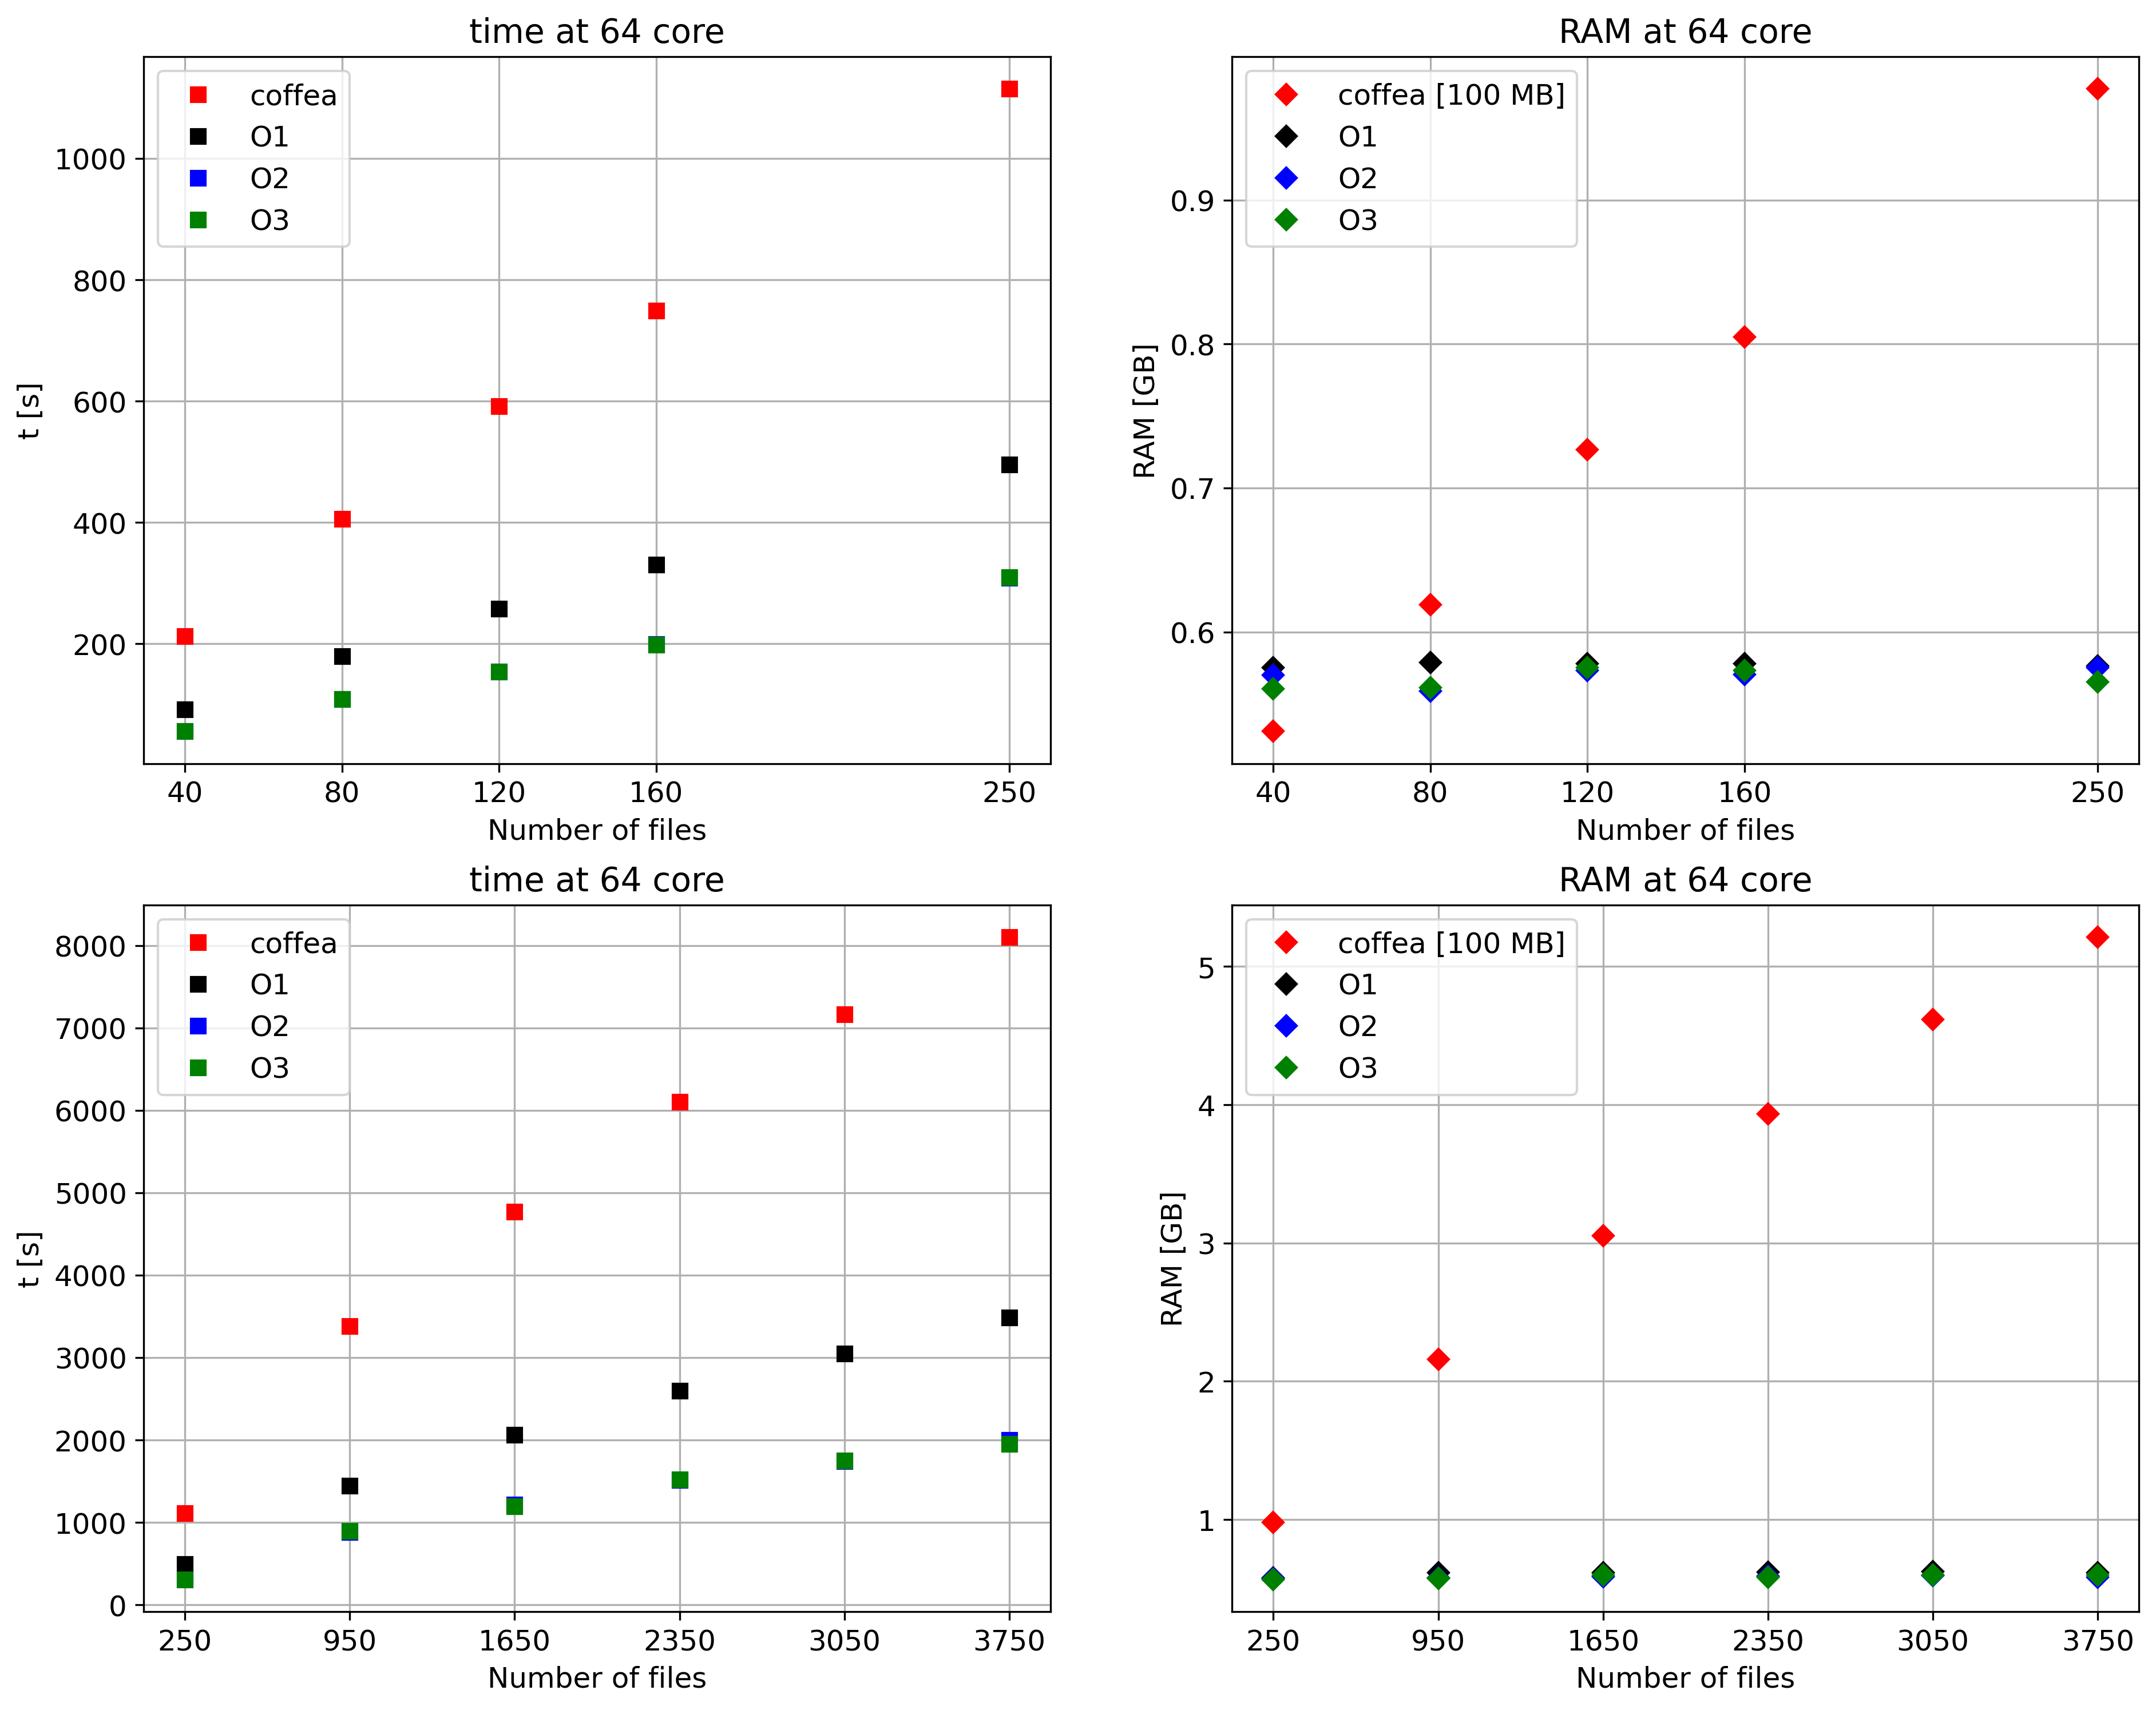

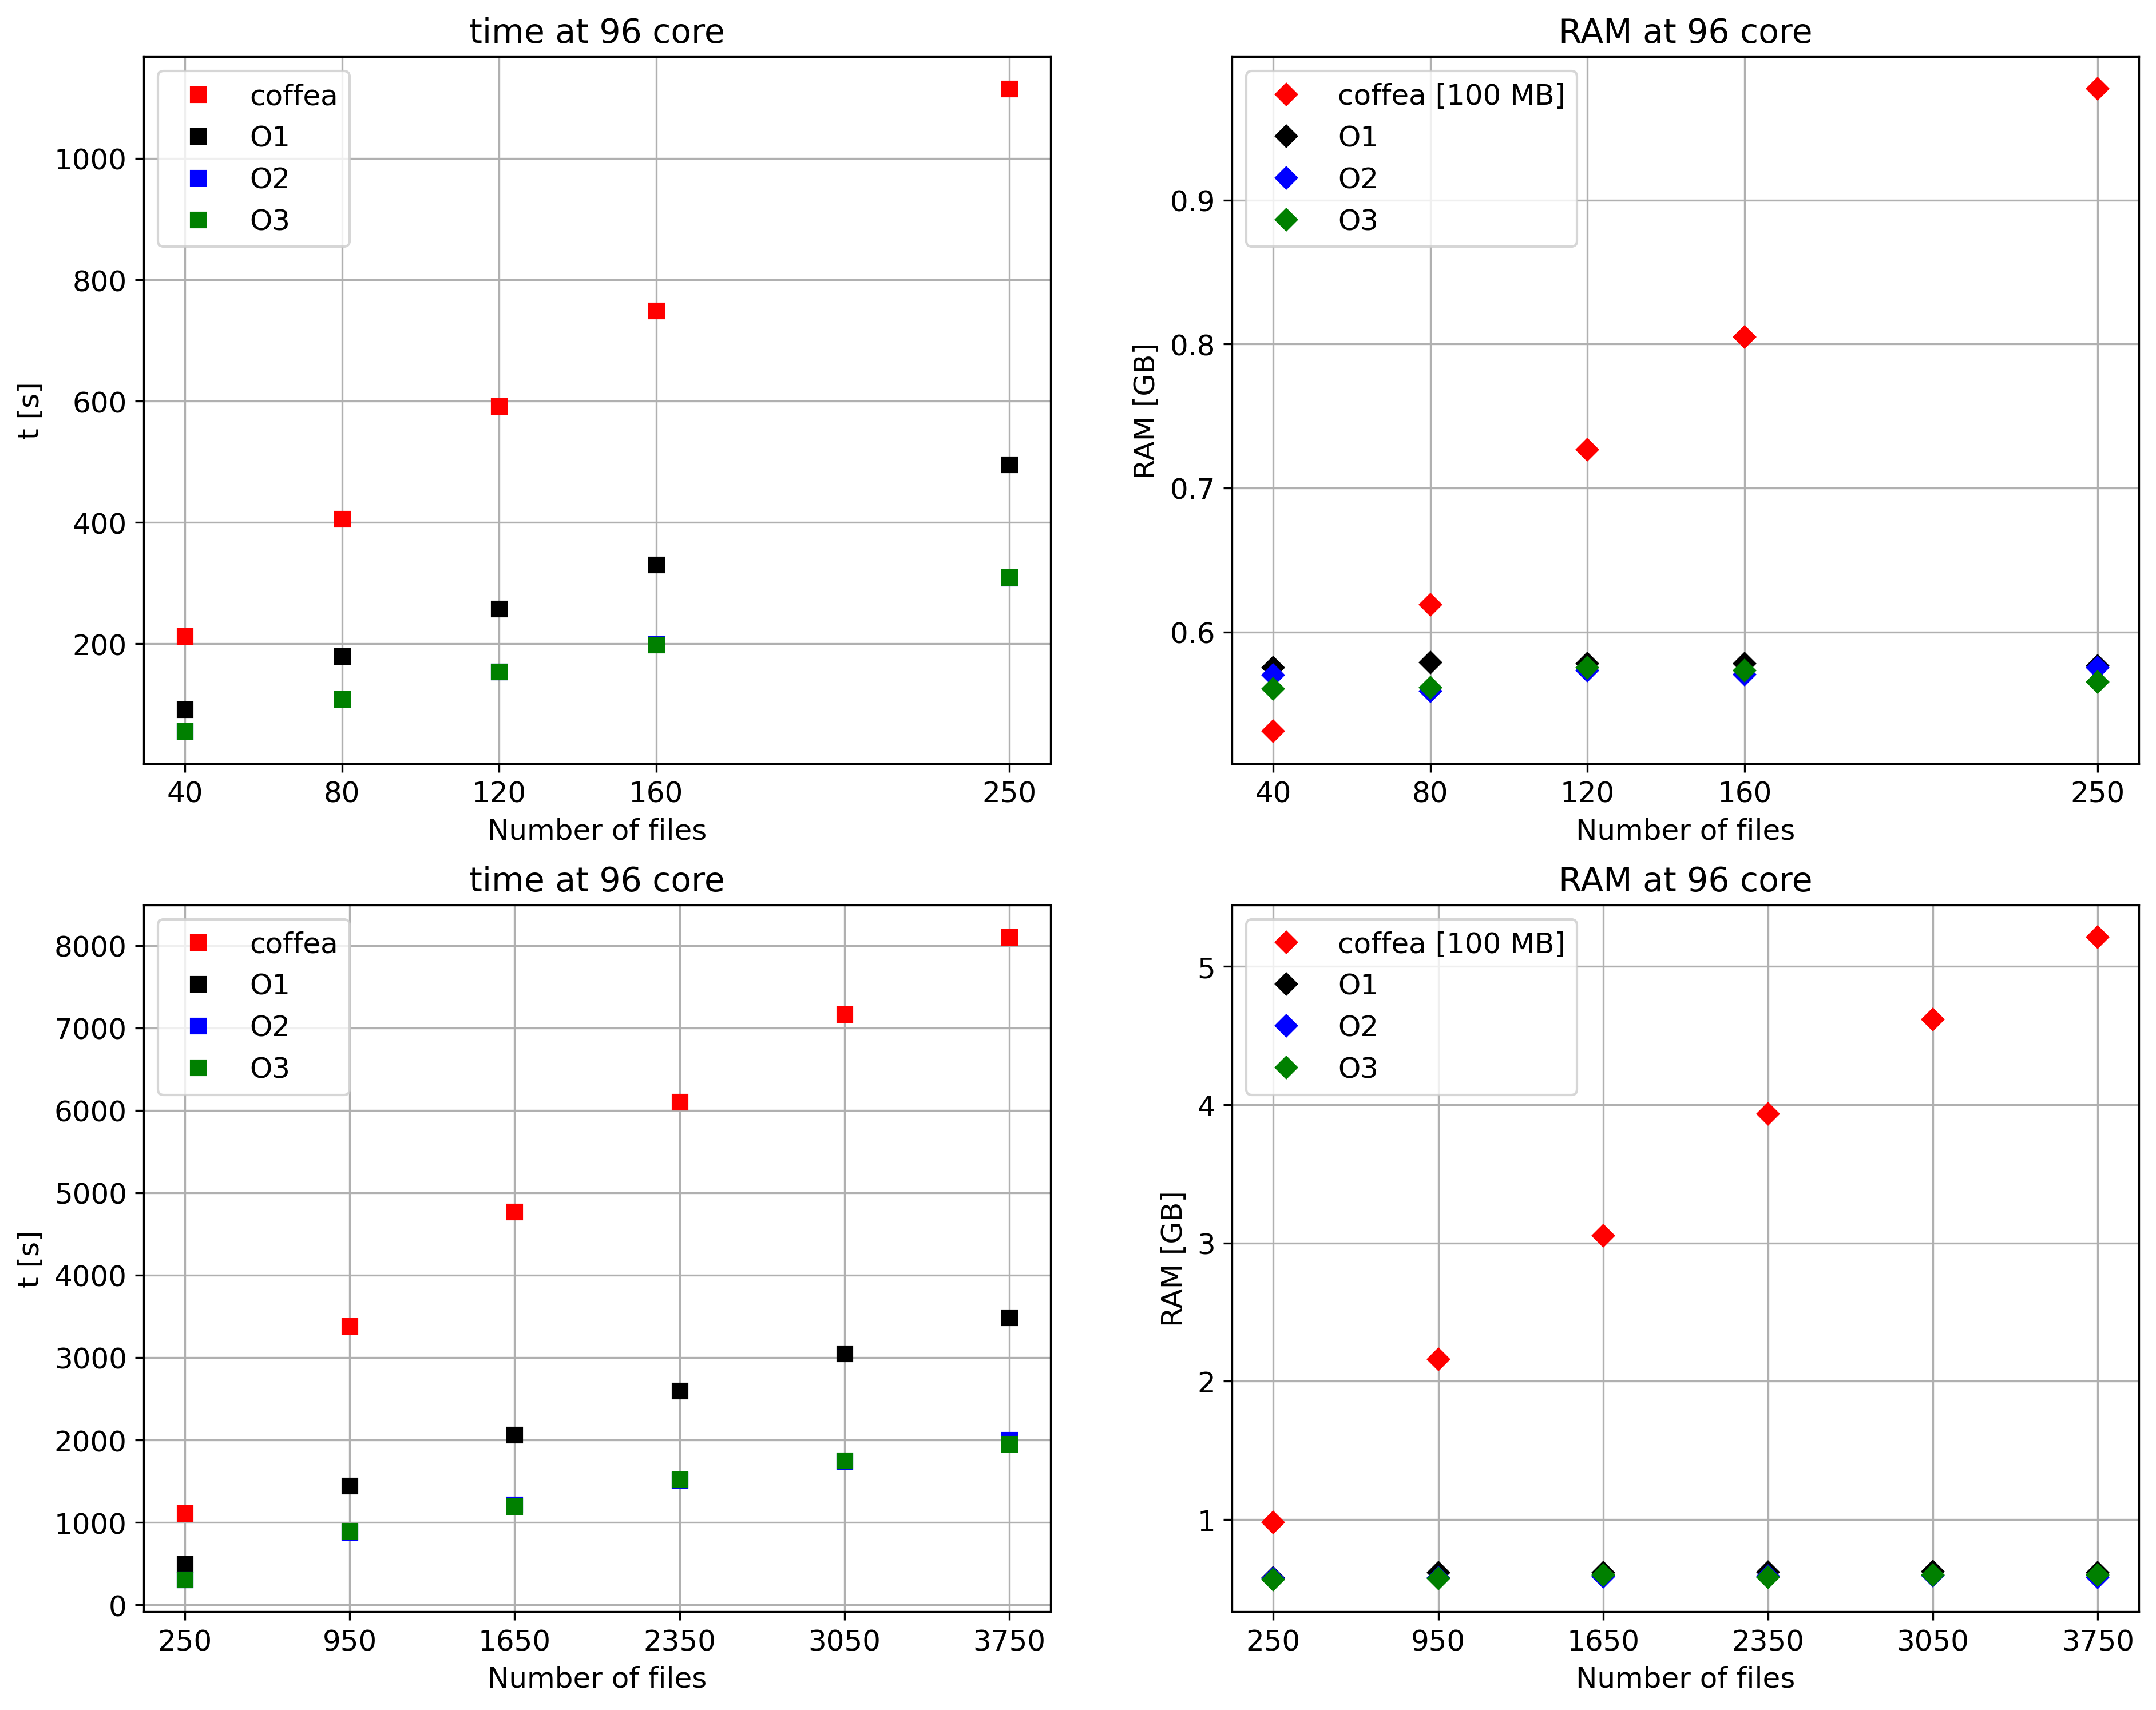

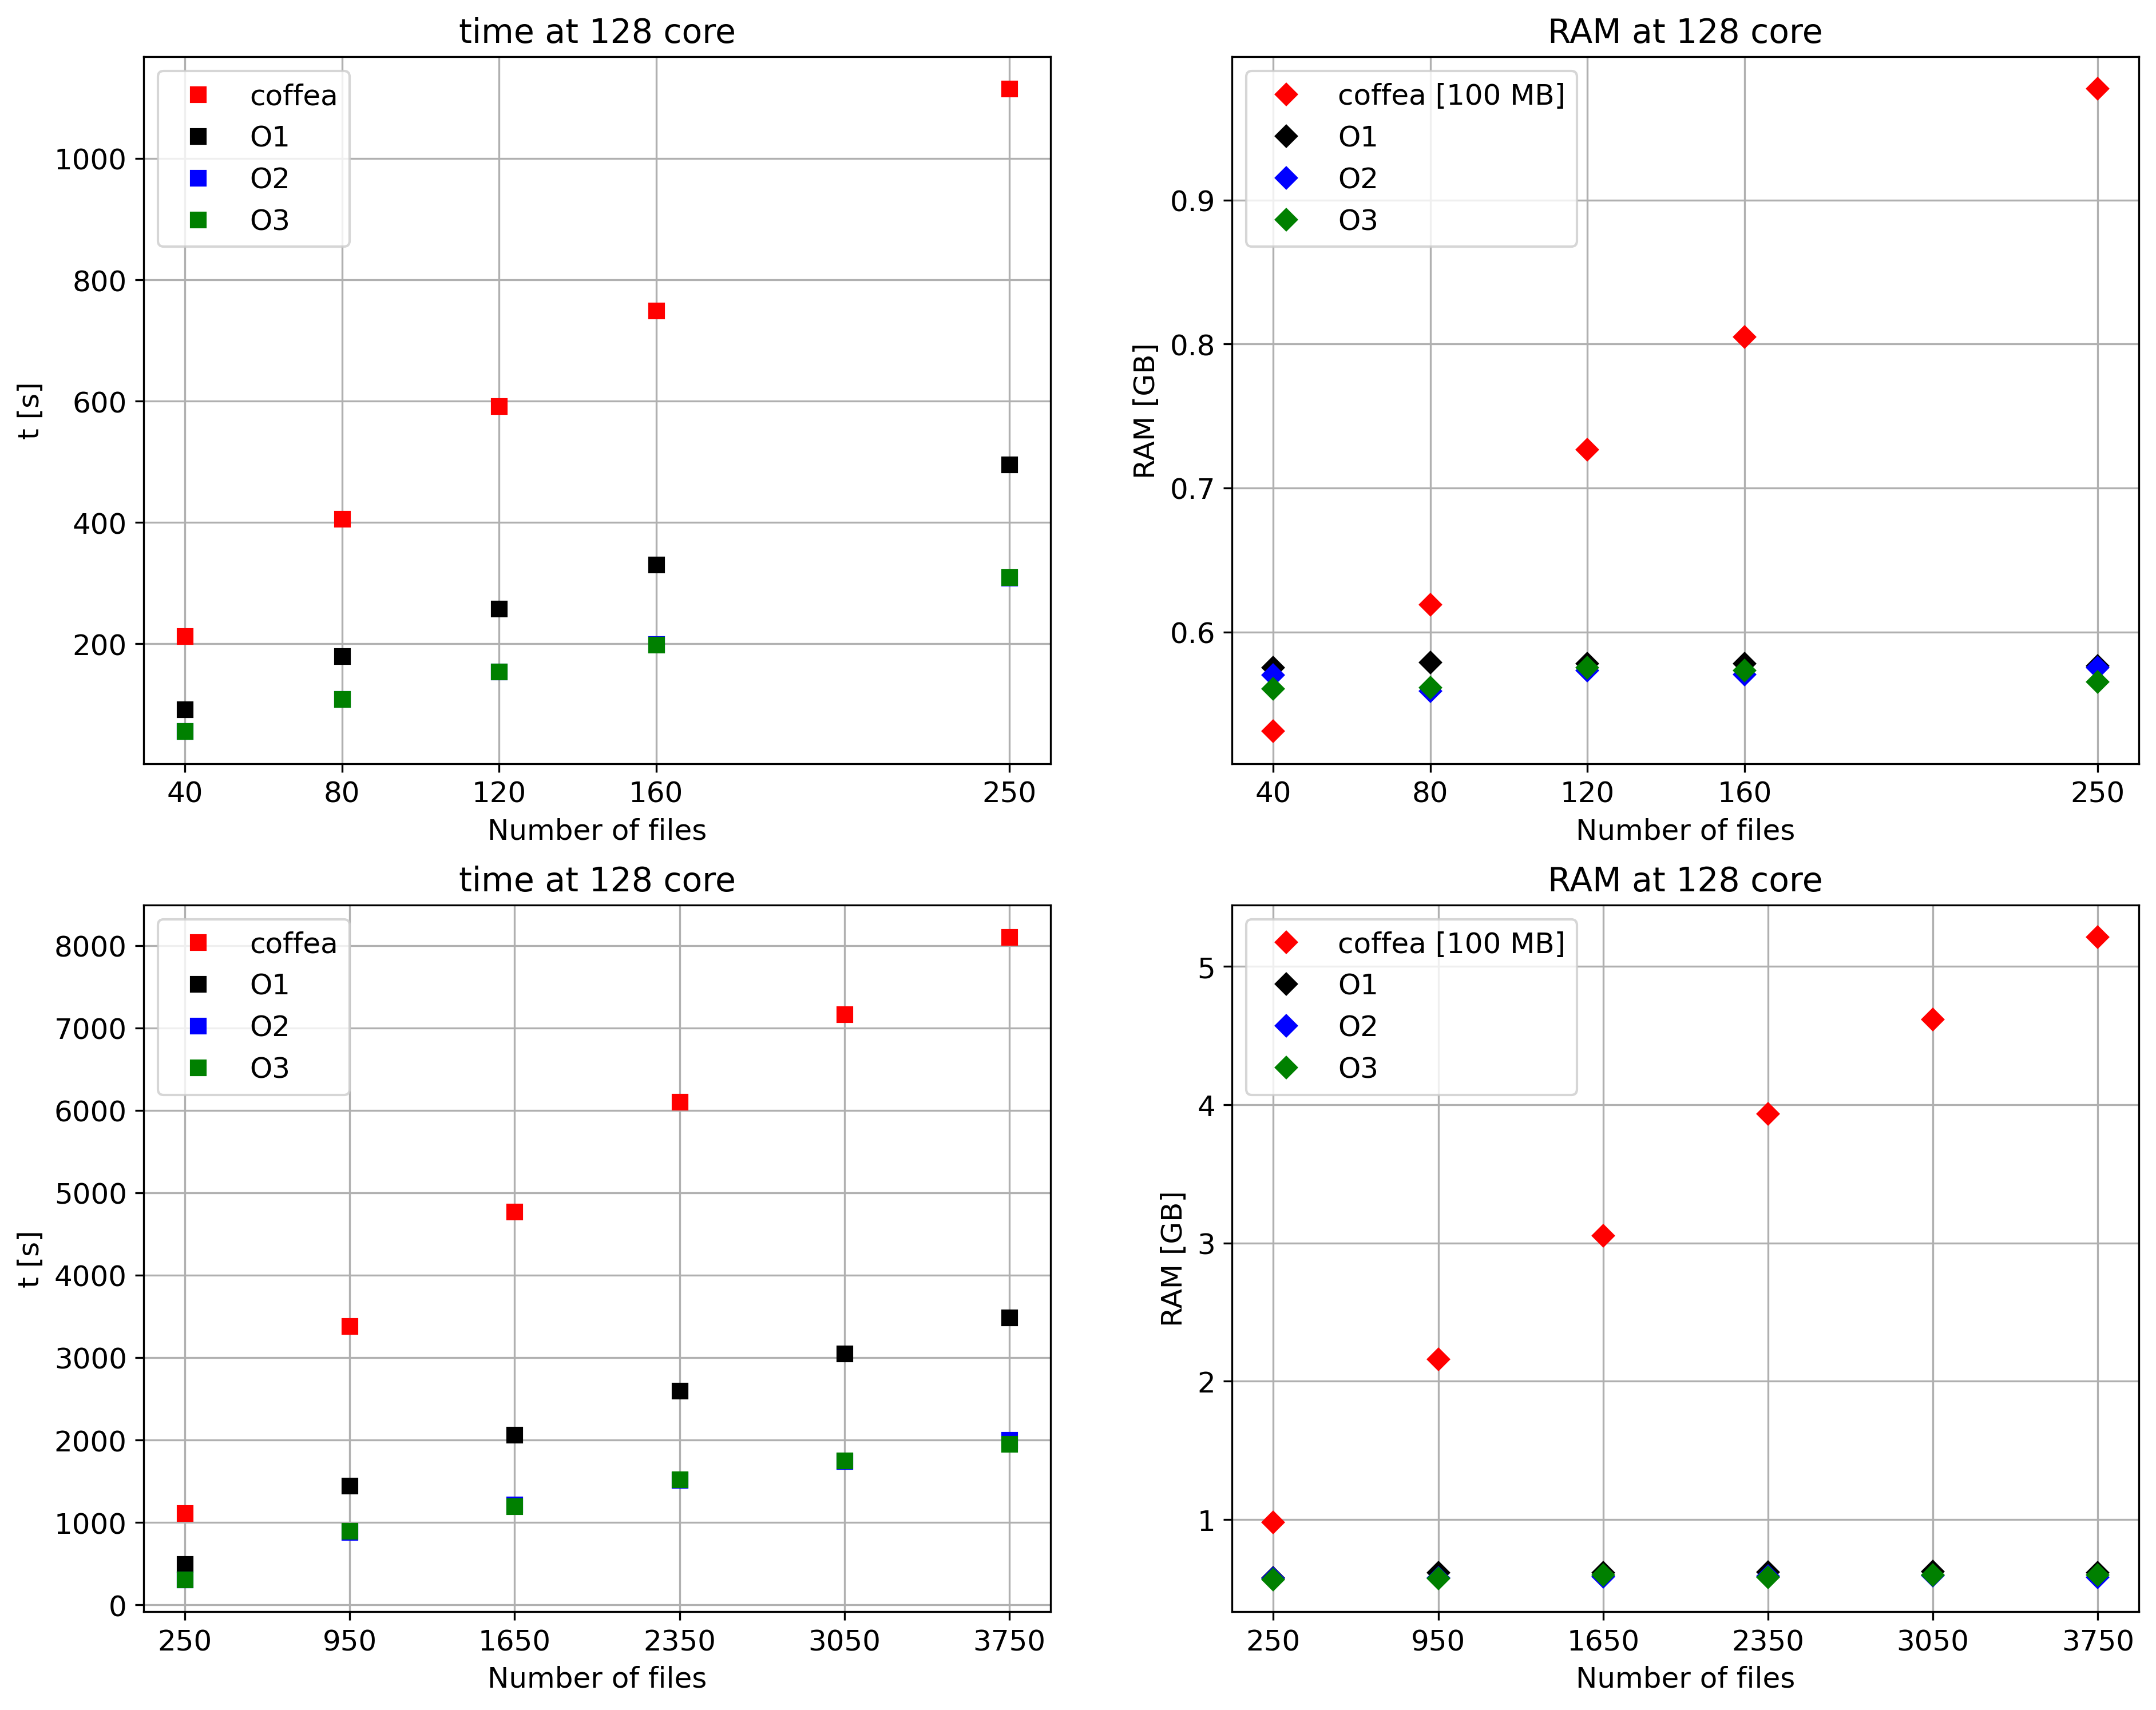

In [26]:
from matplotlib.backends.backend_pdf import PdfPages
pp = PdfPages('histograms/t_vs_file.pdf')
for ncores in [1] + list(range(8, 32, 8)) + list(range(32,129,32)):
    f = get_for_core(ncores)
    pp.savefig(f)
pp.close()